<a href="https://colab.research.google.com/github/Darkeagle011110/Gen-AI-Intern/blob/main/GenAI_infosys_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd

def combine_excel_files(input_folder, output_file):
    """
    Combine multiple Excel files into one.

    :param input_folder: Folder containing the Excel files to combine
    :param output_file: Path to the output Excel file
    """
    # List to hold DataFrames
    combined_data = []

    # Iterate over all files in the folder
    for file in os.listdir(input_folder):
        if file.endswith('.xlsx'):
            # Read the current Excel file
            file_path = os.path.join(input_folder, file)
            print(f"Reading file: {file_path}")
            df = pd.read_excel(file_path)
            combined_data.append(df)

    # Combine all DataFrames
    combined_df = pd.concat(combined_data, ignore_index=True)

    # Write combined data to a new Excel file
    combined_df.to_excel(output_file, index=False)
    print(f"Combined file saved as: {output_file}")

# Usage
input_folder = "/content/input"  # Replace with the folder containing your Excel files
output_file = "/combined_file.xlsx"  # Replace with the path to save the combined file
combine_excel_files(input_folder, output_file)


Reading file: /content/input/dataset5.xlsx
Reading file: /content/input/dataset7.xlsx
Reading file: /content/input/dataset4.xlsx
Reading file: /content/input/dataset_1_2_3_combined.xlsx
Reading file: /content/input/dataset9.xlsx
Reading file: /content/input/dataset6.xlsx
Reading file: /content/input/dataset8.xlsx
Combined file saved as: /combined_file.xlsx


In [ ]:
import os
import pandas as pd

def explore_excel_file(file_path, output_summary_file):
    """
    Explore the characteristics of an Excel file and generate a detailed summary.

    :param file_path: Path to the Excel file to explore
    :param output_summary_file: Path to save the detailed summary
    """
    # Read the Excel file
    print(f"Reading file: {file_path}")
    df = pd.read_excel(file_path)

    # Basic Information
    print("Generating file information...")
    # Use StringIO to capture the output of df.info
    from io import StringIO
    info_buffer = StringIO()
    df.info(buf=info_buffer)  # Pass the StringIO object to buf
    file_info = info_buffer.getvalue()  # Get the captured output

    # Column-wise summary statistics
    print("Generating summary statistics...")
    summary_stats = df.describe(include="all").to_string()

    # Sample data
    print("Generating sample data...")
    sample_data = df.head(5).to_string(index=False)

    # Save summary to a text file
    with open(output_summary_file, "w") as file:
        file.write("=== File Information ===\n")
        file.write(file_info + "\n\n")
        file.write("=== Summary Statistics ===\n")
        file.write(summary_stats + "\n\n")
        file.write("=== Sample Data ===\n")
        file.write(sample_data + "\n")

    print(f"Summary saved to: {output_summary_file}")

# Usage
file_path = "/combined_file.xlsx"  # Replace with the path to your combined Excel file
output_summary_file = "/summary.txt"  # Replace with the path to save the summary
explore_excel_file(file_path, output_summary_file)

Reading file: /combined_file.xlsx
Generating file information...
Generating summary statistics...
Generating sample data...
Summary saved to: /summary.txt


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [ ]:
import pandas as pd
import numpy as np

def clean_data(file_path, output_file):
    """
    Cleans the dataset and saves the cleaned version.

    :param file_path: Path to the input Excel file
    :param output_file: Path to save the cleaned dataset
    """
    # Load the dataset
    df = pd.read_excel(file_path)
    print("Original Data Shape:", df.shape)

    # Drop unnecessary columns
    columns_to_drop = ["Unnamed: 0"]  # Add more columns if needed
    df.drop(columns=columns_to_drop, inplace=True, errors="ignore")

    # Handle missing values
    df["ID"].fillna("Unknown", inplace=True)  # Replace missing IDs with "Unknown"

    # Check if 'Decision' column exists before dropping rows
    if 'Decision' in df.columns:
        df.dropna(subset=["Name", "Role", "Transcript", "Resume", "Decision"], inplace=True)  # Drop rows missing critical info
    else:
        print("Warning: 'Decision' column not found. Skipping dropna for this column.")

    # Remove duplicate rows
    df.drop_duplicates(inplace=True)

    # Standardize text fields
    text_columns = ["Name", "Role", "Transcript", "Resume", "Decision", "Reason for decision", "Job Description"]
    for col in text_columns:
        # Check if column exists before processing
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower()  # Convert to lowercase and remove extra spaces

    # Clean specific text columns
    def clean_text(text):
        text = text.replace("\n", " ").replace("\r", " ")  # Replace newlines with spaces
        text = " ".join(text.split())  # Remove extra spaces
        return text

    for col in ["Transcript", "Resume", "Job Description", "Reason for decision"]:
        # Check if column exists before processing
        if col in df.columns:
            df[col] = df[col].apply(clean_text)

    # Handle the word count column
    if "num_words_in_transcript" in df.columns:
        df["num_words_in_transcript"] = df["num_words_in_transcript"].fillna(0).astype(int)

    # Save the cleaned dataset
    print("Cleaned Data Shape:", df.shape)
    df.to_excel(output_file, index=False)
    print(f"Cleaned dataset saved to {output_file}")

# Usage
input_file = "/combined_file.xlsx"  # Replace with the path to your dataset
output_file = "/clean.xlsx"  # Replace with the desired path for the cleaned dataset
clean_data(input_file, output_file)

Original Data Shape: (3174, 11)


<ipython-input-9-0fcbad64d422>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ID"].fillna("Unknown", inplace=True)  # Replace missing IDs with "Unknown"


Cleaned Data Shape: (3174, 10)
Cleaned dataset saved to /clean.xlsx


In [ ]:
final_data = pd.read_excel('/clean.xlsx')
final_data.head()

ID             Name               Role  \
0  durgba001  elizabeth smith        ui engineer   
1  durgba002  amanda campbell      data engineer   
2  durgba003    stephen velez    product manager   
3  durgba004         guy shaw      data engineer   
4  durgba005   jeffrey bailey  software engineer   

                                          Transcript  \
0  interview transcript interviewer: rachel lee, ...   
1  interview transcript: data engineer position i...   
2  product manager interview interviewer: rachel ...   
3  interview transcript interviewer: rachel patel...   
4  interview transcript interviewer: rachel chen,...   

                                              Resume decision  \
0  elizabeth smith ui engineer contact informatio...   reject   
1  amanda campbell contact information: * email: ...   reject   
2  stephen velez contact information: * email: [s...   reject   
3  guy shaw data engineer contact information: * ...   select   
4  here is a resume for jeffrey bailey: jeffrey b...   reject   

                                 Reason for decision  \
0  showed lack of preparedness for typical interv...   
1  had difficulty applying theoretical knowledge ...   
2  displayed rigidity in adapting to alternative ...   
3  displayed excellent collaboration and teamwork...   
4  had difficulty applying theoretical knowledge ...   

                                     Job Description  \
0  skilled ui engineer with expertise in frontend...   
1  skilled data engineer with expertise in python...   
2  skilled product manager with expertise in road...   
3  skilled data engineer with expertise in python...   
4  skilled software engineer with expertise in we...   

  Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, being able to write high-quality, efficient code is crucial. Can you give me an example of a particularly challenging coding problem you've solved in the past? How did you approach it?\n\n**Alice Smith:** Well, there was this one time...I think it was a homework assignment or something. We had to implement a sorting algorithm, and I chose to use...um...merge sort, I think? I don't really remember the details, but it was a while ago.\n\n**Interviewer:** Merge sort is a good choice. But can you tell me more about the specifics of how you implemented it? For example, how did you handle edge cases or optimize the algorithm for performance?\n\n**Alice Smith:** (pauses) Honestly, I don't really remember. I mean, I wrote the code, but I don't recall the details of how I handled edge cases or anything like that.\n\n**Interviewer:** I understand that it's been a while since you wrote the code, but as a software engineer, being able to recall and explain the details of your work is important. Can you tell me about your experience with any specific software development methodologies, such as Agile or Scrum?\n\n**Alice Smith:** (nervously) Uh, I've heard of those...I think? We used something like that on a project once, but I don't really remember the specifics. I'm sure it's not that impor

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 10 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

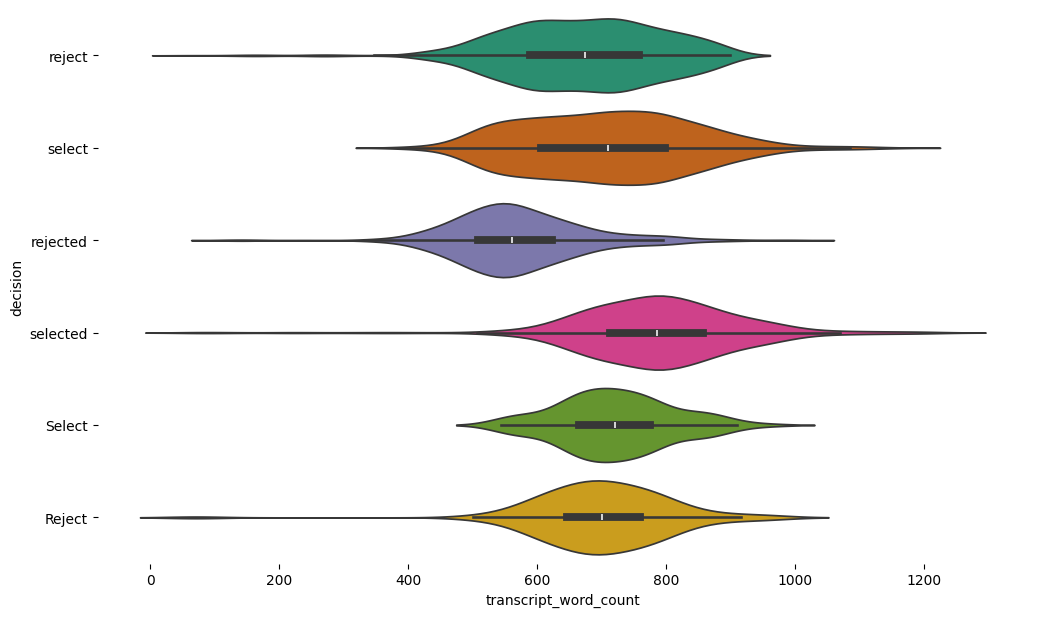

In [ ]:
# decision vs transcript_word_count this while show how long transcript of interview should have a higher chances of getting selected.

from matplotlib import pyplot as plt
import seaborn as sns

# Recalculate transcript_word_count to ensure it's in the DataFrame
# Assuming 'Transcript' is the original column name
final_data['transcript_word_count'] = final_data['Transcript'].apply(lambda x: len(str(x).split()))  # Changed 'transcript' to 'Transcript'

figsize = (12, 1.2 * len(final_data['decision'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(final_data, x='transcript_word_count', y='decision', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

The violin plot visualizes the distribution of transcript word counts for each decision outcome (e.g., 'select', 'reject'). By examining the shape and position of the violins, you can potentially gain insights such as:

1. Relationship between transcript length and selection:
Observe whether there's a noticeable difference in the distribution of transcript word counts between selected and rejected candidates. If selected candidates tend to have longer transcripts (wider violin shape or higher median), it suggests that longer interview conversations might be associated with a higher chance of selection.
2. Distribution of word counts:
 Look for the overall shape of the violins. Are they skewed, symmetric, or multimodal? This can provide insights into the variability of transcript lengths for each decision outcome. For example, a wider violin for selected candidates might indicate a greater range of acceptable transcript lengths.
3. Outliers:
 Check for any outliers (data points outside the whiskers of the box plot) in the violin plots. These could represent unusually long or short transcripts that might warrant further investigation.
4. Comparison across decisions:
 Compare the violins for different decision outcomes to identify any patterns or differences. For example, if the violin for selected candidates is shifted towards higher word counts compared to rejected candidates, it strengthens the hypothesis that longer transcripts are favored.

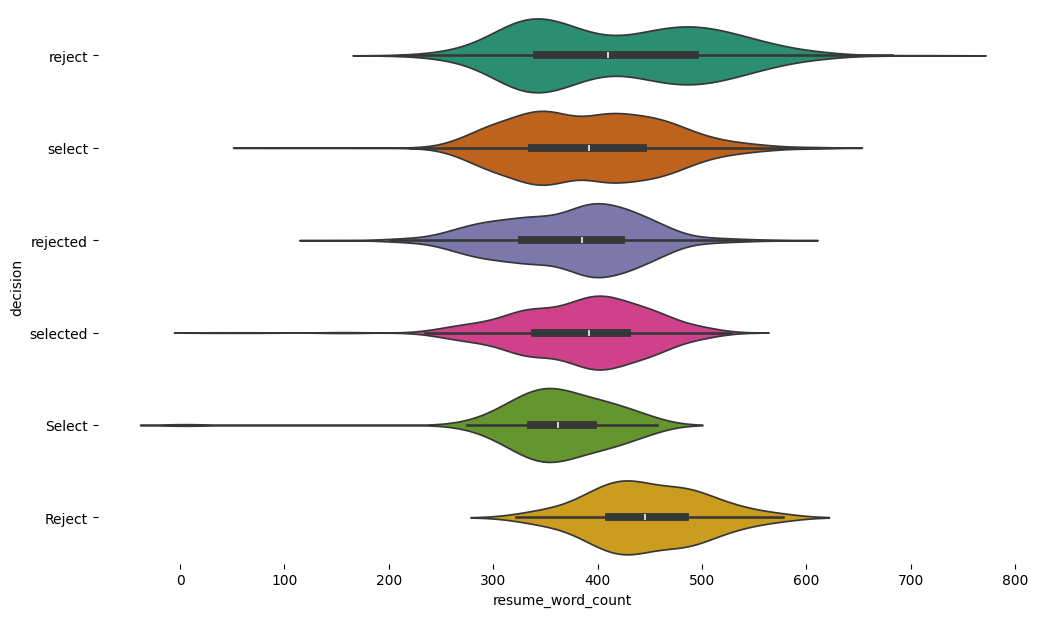

In [ ]:
# decision vs resume_word_count this while show how detailed resume should have a higher chances of getting selected.

from matplotlib import pyplot as plt
import seaborn as sns
# Calculate resume_word_count and add it to the DataFrame
final_data['resume_word_count'] = final_data['Resume'].apply(lambda x: len(str(x).split()))

# Now create the violin plot
figsize = (12, 1.2 * len(final_data['decision'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(final_data, x='resume_word_count', y='decision', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

The violin plot you've generated visualizes the distribution of resume word counts for each decision outcome (e.g., 'select', 'reject'). Here's a breakdown of the insights you can potentially extract:

1. Relationship between Resume Length and Selection:
Observe the width and median of the violins for 'select' and 'reject' decisions. If the 'select' violin is wider or has a higher median compared to the 'reject' violin, it suggests that candidates with longer resumes (more detailed information) might have a higher chance of being selected.
Look for any significant overlap between the violins. Substantial overlap indicates that resume length might not be a strong predictor of selection on its own. However, if there's minimal overlap and the distributions are clearly separated, it suggests a stronger relationship.
2. Distribution of Word Counts:
Examine the shape of the violins. Are they skewed, symmetric, or multimodal? This provides insights into the variability of resume lengths for each decision outcome. For example, a wider violin for 'select' candidates might indicate a broader range of acceptable resume lengths.
3. Outliers:
Check for any outliers (data points outside the whiskers of the box plot within the violins). Outliers represent unusually long or short resumes that might require further investigation. They could be candidates with exceptionally detailed resumes or those who have omitted important information.
4. Overall Insight:
Based on the combined observations, you can infer whether a detailed resume, as indicated by higher word counts, is generally associated with a higher chance of selection. If the 'select' violin is consistently wider or has a higher median and minimal overlap with the 'reject' violin, it supports the hypothesis that detailed resumes are favored.

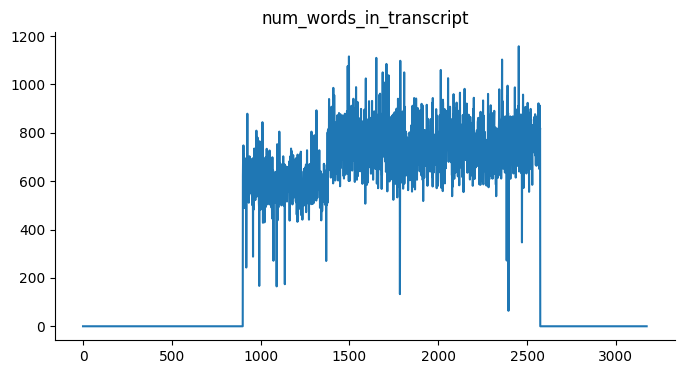

In [ ]:
# Number of words in transcript show that the we come to know how long the conversion is get long.

from matplotlib import pyplot as plt
final_data['num_words_in_transcript'].plot(kind='line', figsize=(8, 4), title='num_words_in_transcript')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Step 3: Data Preprocessing
# Convert decision to categorical type
final_data['decision'] = final_data['decision'].astype('category')

In [ ]:
final_data['decision'] = final_data['decision'].str.lower()  # Convert to lowercase
final_data['decision'] = final_data['decision'].replace({
    'select': 'select',
    'selected': 'select',
    'reject': 'reject',
    'rejected': 'reject'
})


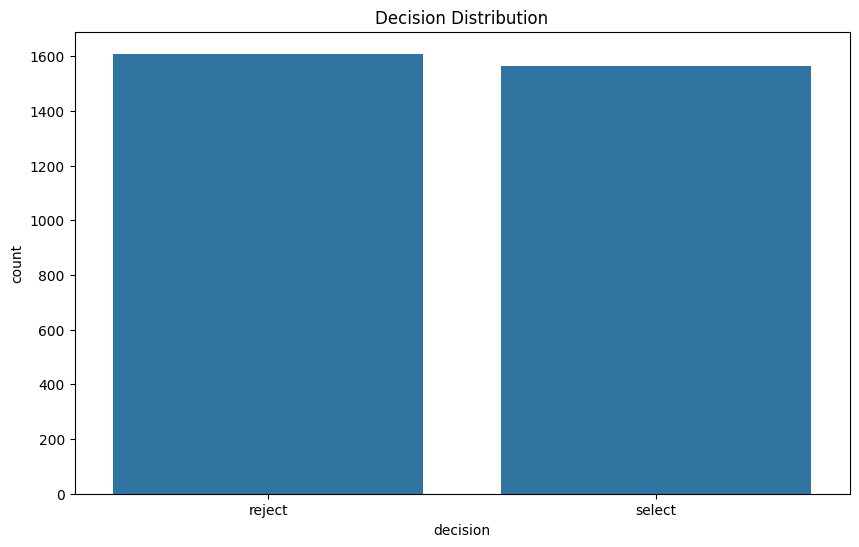

In [ ]:
# Step 4: Exploratory Data Analysis
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=final_data, x='decision')
plt.title("Decision Distribution")
plt.show()

In [ ]:
# Display all unique roles in the 'roles' column
# Check if the column name is 'Role' instead of 'role'
unique_roles = final_data['Role'].unique()  # Change 'role' to 'Role'
print(unique_roles)

['ui engineer' 'data engineer' 'product manager' 'software engineer'
 'data scientist' 'data analyst' 'ui designer' 'project manager'
 'software developer' 'digital marketing specialist'
 'cybersecurity specialist' 'hr specialist' 'network engineer'
 'graphic designer' 'game developer' 'mobile app developer'
 'cloud architect' 'business analyst' 'database administrator'
 'devops engineer' 'machine learning engineer' 'content writer'
 'system administrator' 'ui/ux designer' 'ai engineer']


In [ ]:
# Mapping dictionary for grouping roles
role_mapping = {
    'Software Developer': 'Software Engineer',
    'Software Engineer': 'Software Engineer',
    'Data Engineer': 'Data Analyst',
    'Data Analyst': 'Data Analyst',
    'UI/UX Designer': 'UI/UX Designer',
    'UI Engineer': 'UI/UX Designer',
    'UI Designer': 'UI/UX Designer',
    'Cybersecurity Specialist': 'Cybersecurity Specialist',
    'Network Engineer': 'Cybersecurity Specialist',
    'Cloud Architect': 'Cloud Architect',
    'DevOps Engineer': 'Cloud Architect',
    'AI Engineer': 'AI Engineer',
    'Machine Learning Engineer': 'AI Engineer',
    'System Administrator': 'System Administrator',
    'Database Administrator': 'System Administrator',
    'Digital Marketing Specialist': 'Digital Marketing Specialist',
    'Content Writer': 'Digital Marketing Specialist',
    'Graphic Designer': 'Mobile Game Developer',
    'Game Developer': 'Mobile Game Developer',
    'Mobile App Developer': 'Mobile Game Developer',
    'HR Specialis': 'Digital Marketing Specialist',
    'HR Specialist' : 'Digital Marketing Specialist',
    'Project Manager' : 'System Administrator'
}


In [ ]:
# Apply the mapping to group roles
# Change 'role' to 'Role' to match the actual column name
final_data['Role'] = final_data['Role'].replace(role_mapping)

# Check the unique values after grouping
# Change 'role' to 'Role' here as well
print(final_data['Role'].unique())

['ui engineer' 'data engineer' 'product manager' 'software engineer'
 'data scientist' 'data analyst' 'ui designer' 'project manager'
 'software developer' 'digital marketing specialist'
 'cybersecurity specialist' 'hr specialist' 'network engineer'
 'graphic designer' 'game developer' 'mobile app developer'
 'cloud architect' 'business analyst' 'database administrator'
 'devops engineer' 'machine learning engineer' 'content writer'
 'system administrator' 'ui/ux designer' 'ai engineer']


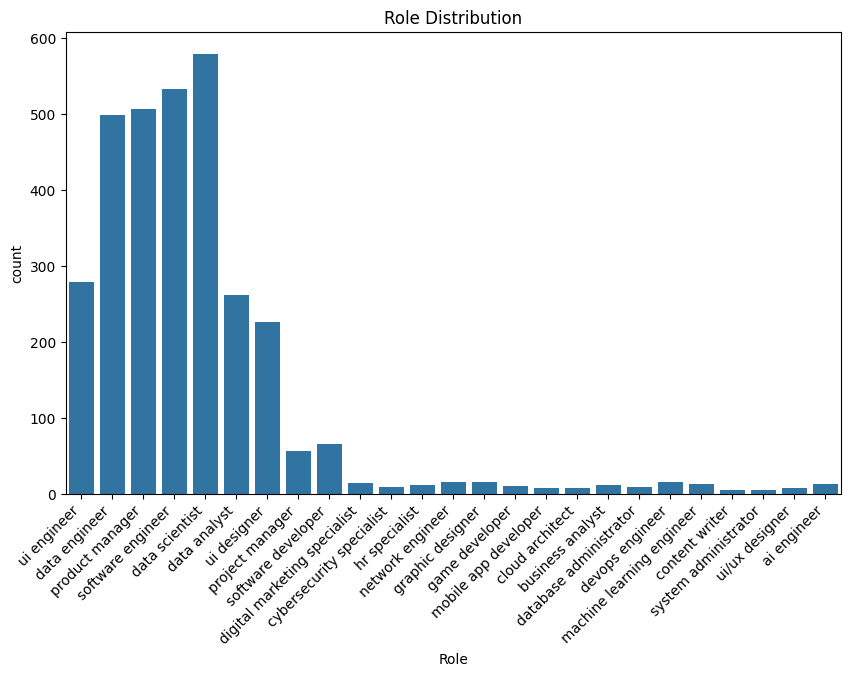

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=final_data, x='Role')
plt.title("Role Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees
plt.show()


In [ ]:
# Calculate the number of words in the 'Transcript' column
final_data['num_words_in_transcript'] = final_data['Transcript'].apply(lambda x: len(str(x).split()))


In [ ]:
# Group by Role and decision and calculate mean, median, and standard deviation
aggregated_data = final_data.groupby(['Role', 'decision'])['num_words_in_transcript'].agg(['mean', 'median', 'std']).reset_index()


In [ ]:
print(aggregated_data)

                            Role decision        mean  median         std
0                    ai engineer   reject  567.200000   555.0   18.212633
1                    ai engineer   select  659.125000   682.0  204.121419
2               business analyst   reject  616.400000   578.0  110.323615
3               business analyst   select  693.833333   693.5   54.802980
4                cloud architect   reject  587.000000   619.0   76.906870
5                cloud architect   select  802.250000   796.5   19.670197
6                 content writer   reject  529.000000   532.0   61.554854
7                 content writer   select  684.500000   684.5   30.405592
8       cybersecurity specialist   reject  636.000000   604.5  123.835375
9       cybersecurity specialist   select  704.000000   671.0   77.929455
10                  data analyst   reject  677.571429   685.0  110.356261
11                  data analyst   select  767.414062   760.0  109.459986
12                 data engineer   rej

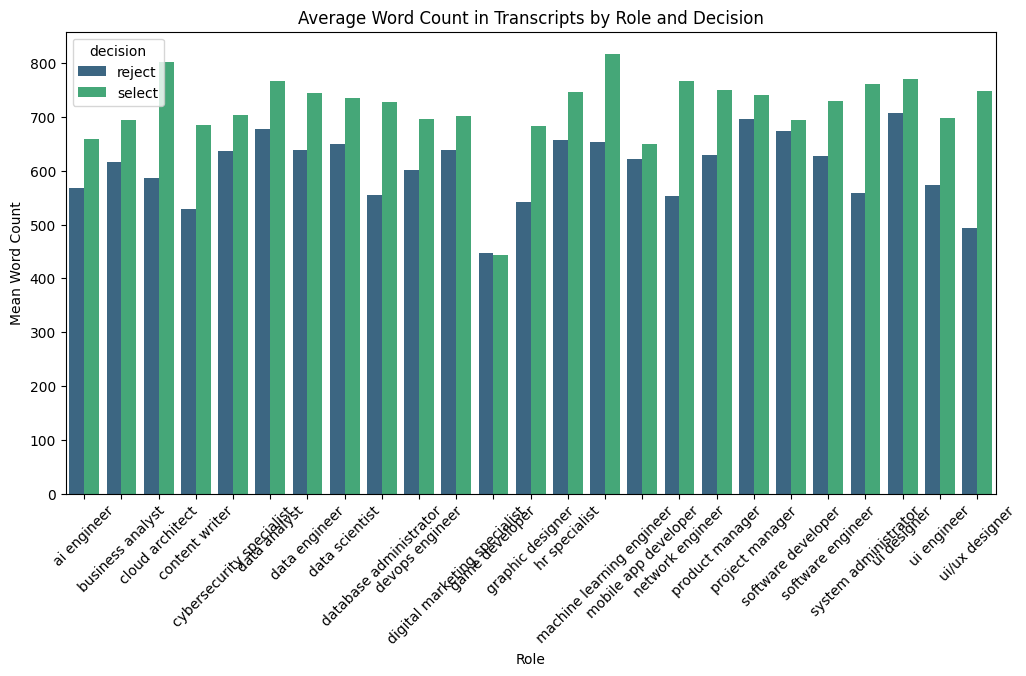

In [ ]:
# Bar plot for mean word count by Role and decision
plt.figure(figsize=(12, 6))
sns.barplot(data=aggregated_data, x='Role', y='mean', hue='decision', palette='viridis')
plt.title('Average Word Count in Transcripts by Role and Decision')
plt.xlabel('Role')
plt.ylabel('Mean Word Count')
plt.xticks(rotation=45)
plt.show()


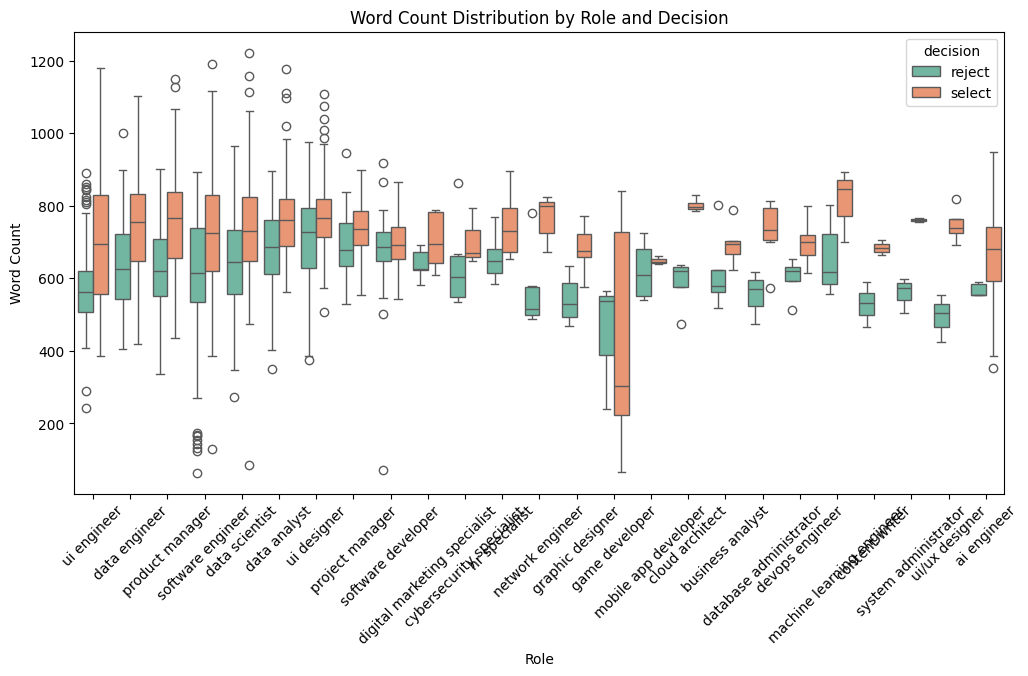

In [ ]:
# Box plot for distribution of word count by Role and decision
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_data, x='Role', y='num_words_in_transcript', hue='decision', palette='Set2')
plt.title('Word Count Distribution by Role and Decision')
plt.xlabel('Role')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()


Word Count as a Predictor:

1. Longer and more detailed responses correlate with a higher likelihood of selection for most roles.
2. Specific roles, such as AI Engineer, Product Manager, and Cybersecurity Specialist, show the strongest positive correlation between word count and selection.
3. Roles like Mobile Game Developer require less detail overall, as both selected and rejected candidates tend to have lower word counts.
4. Roles like Product Manager and AI Engineer place a premium on detailed responses.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Text preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(str(text).lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

for col in ['Transcript', 'Resume', 'Reason for decision', 'Job Description']:  # Updated column names

    final_data[col] = final_data[col].apply(preprocess_text)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 12 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
# Feature: Word count
final_data['transcript_word_count'] = final_data['Transcript'].apply(lambda x: len(str(x).split()))
final_data['resume_word_count'] = final_data['Resume'].apply(lambda x: len(str(x).split()))


In [ ]:
# Sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
final_data['transcript_sentiment'] = final_data['Transcript'].apply(lambda x: sia.polarity_scores(x)['compound'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# TF-IDF vectorization and similarity scores
vectorizer = TfidfVectorizer()
job_desc_vectors = vectorizer.fit_transform(final_data['Job Description'])
resume_vectors = vectorizer.transform(final_data['Resume'])
transcript_vectors = vectorizer.transform(final_data['Transcript'])

In [ ]:
final_data['resume_job_similarity'] = [cosine_similarity(resume_vectors[i], job_desc_vectors[i])[0][0] for i in range(len(final_data))]
final_data['transcript_job_similarity'] = [cosine_similarity(transcript_vectors[i], job_desc_vectors[i])[0][0] for i in range(len(final_data))]


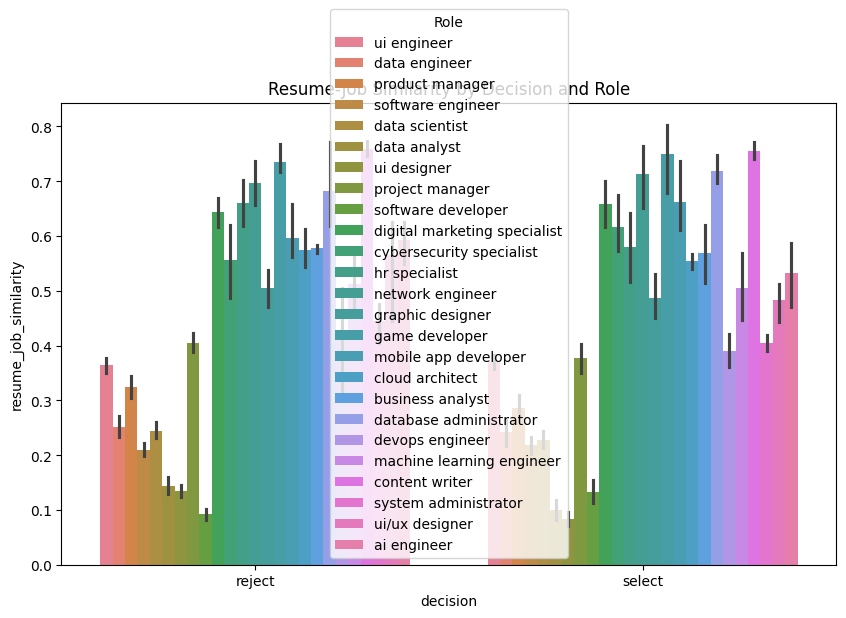

In [ ]:
# Visualization example: Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=final_data, x='decision', y='resume_job_similarity', hue='Role')
plt.title("Resume-Job Similarity by Decision and Role")
plt.show()

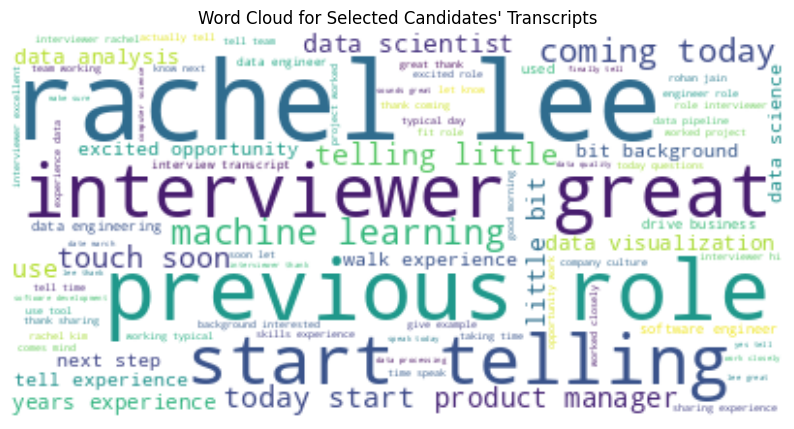

In [ ]:
# Word cloud for selected candidates
selected_transcripts = " ".join(final_data[final_data['decision'] == 'select']['Transcript'])
wordcloud = WordCloud(background_color='white').generate(selected_transcripts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Selected Candidates' Transcripts")
plt.show()

In [ ]:
final_data.head()

ID             Name               Role  \
0  durgba001  elizabeth smith        ui engineer   
1  durgba002  amanda campbell      data engineer   
2  durgba003    stephen velez    product manager   
3  durgba004         guy shaw      data engineer   
4  durgba005   jeffrey bailey  software engineer   

                                          Transcript  \
0  interview transcript interviewer rachel lee se...   
1  interview transcript data engineer position in...   
2  product manager interview interviewer rachel l...   
3  interview transcript interviewer rachel patel ...   
4  interview transcript interviewer rachel chen e...   

                                              Resume decision  \
0  elizabeth smith ui engineer contact informatio...   reject   
1  amanda campbell contact information email mail...   reject   
2  stephen velez contact information email mailto...   reject   
3  guy shaw data engineer contact information pho...   select   
4  resume jeffrey bailey jeffrey bailey contact i...   reject   

                                 Reason for decision  \
0  showed lack preparedness typical interview cha...   
1  difficulty applying theoretical knowledge prac...   
2  displayed rigidity adapting alternative approa...   
3  displayed excellent collaboration teamwork min...   
4  difficulty applying theoretical knowledge prac...   

                                     Job Description  \
0  skilled ui engineer expertise frontend framewo...   
1  skilled data engineer expertise python tools d...   
2  skilled product manager expertise roadmap deve...   
3  skilled data engineer expertise python cloud p...   
4  skilled software engineer expertise web develo...   

  Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, being able to write high-quality, efficient code is crucial. Can you give me an example of a particularly challenging coding problem you've solved in the past? How did you approach it?\n\n**Alice Smith:** Well, there was this one time...I think it was a homework assignment or something. We had to implement a sorting algorithm, and I chose to use...um...merge sort, I think? I don't really remember the details, but it was a while ago.\n\n**Interviewer:** Merge sort is a good choice. But can you tell me more about the specifics of how you implemented it? For example, how did you handle edge cases or optimize the algorithm for performance?\n\n**Alice Smith:** (pauses) Honestly, I don't really remember. I mean, I wrote the code, but I don't recall the details of how I handled edge cases or anything like that.\n\n**Interviewer:** I understand that it's been a while since you wrote the code, but as a software engineer, being able to recall and explain the details of your work is important. Can you tell me about your experience with any specific software development methodologies, such as Agile or Scrum?\n\n**Alice Smith:** (nervously) Uh, I've heard of those...I think? We used something like that on a project once, but I don't really remember the specifics. I'm sure it's not that impor

Observations:

1. Higher Resume-Job Similarity for Selected Candidates: Across most roles, candidates with higher similarity scores (bars closer to 1.0 on the Y-axis) are more likely to be selected. Examples: Data Scientist: Selected candidates have significantly higher similarity scores than rejected ones. AI Engineer: A clear gap between selected and rejected candidates, showing the importance of aligning resumes to the job description.

2. Roles with Less Impact of Resume Similarity: Some roles, such as System Administrator and UI/UX Designer, show smaller differences in resume-job similarity between selected and rejected candidates. This indicates that other factors (e.g., transcript quality or interview performance) may weigh more heavily in selection.

3. Rejected Candidates Scores Are Generally Lower: Most roles show that rejected candidates have lower resume-job similarity scores, supporting the idea that alignment with the job description is crucial.

In [ ]:
print(final_data.head())  # Check the first few rows
print(final_data.info())  # Check for missing or null values
print(final_data.describe())  # Summary statistics for numerical columns


          ID             Name               Role  \
0  durgba001  elizabeth smith        ui engineer   
1  durgba002  amanda campbell      data engineer   
2  durgba003    stephen velez    product manager   
3  durgba004         guy shaw      data engineer   
4  durgba005   jeffrey bailey  software engineer   

                                          Transcript  \
0  interview transcript interviewer rachel lee se...   
1  interview transcript data engineer position in...   
2  product manager interview interviewer rachel l...   
3  interview transcript interviewer rachel patel ...   
4  interview transcript interviewer rachel chen e...   

                                              Resume decision  \
0  elizabeth smith ui engineer contact informatio...   reject   
1  amanda campbell contact information email mail...   reject   
2  stephen velez contact information email mailto...   reject   
3  guy shaw data engineer contact information pho...   select   
4  resume jeffrey bailey 

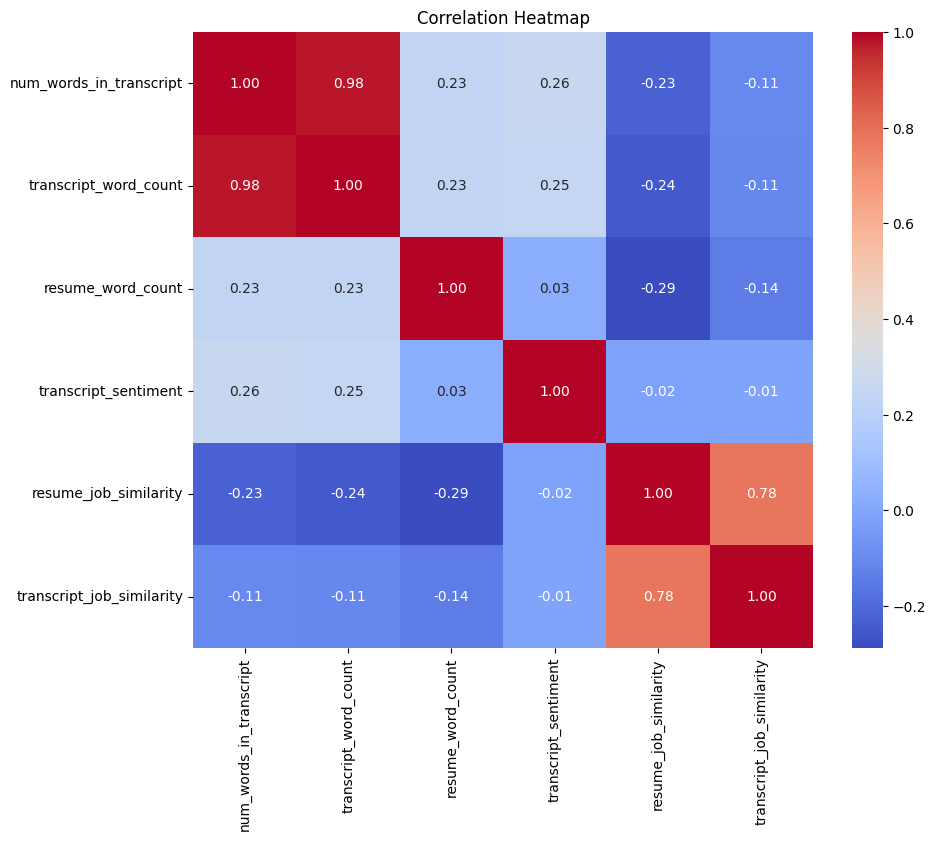

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(final_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


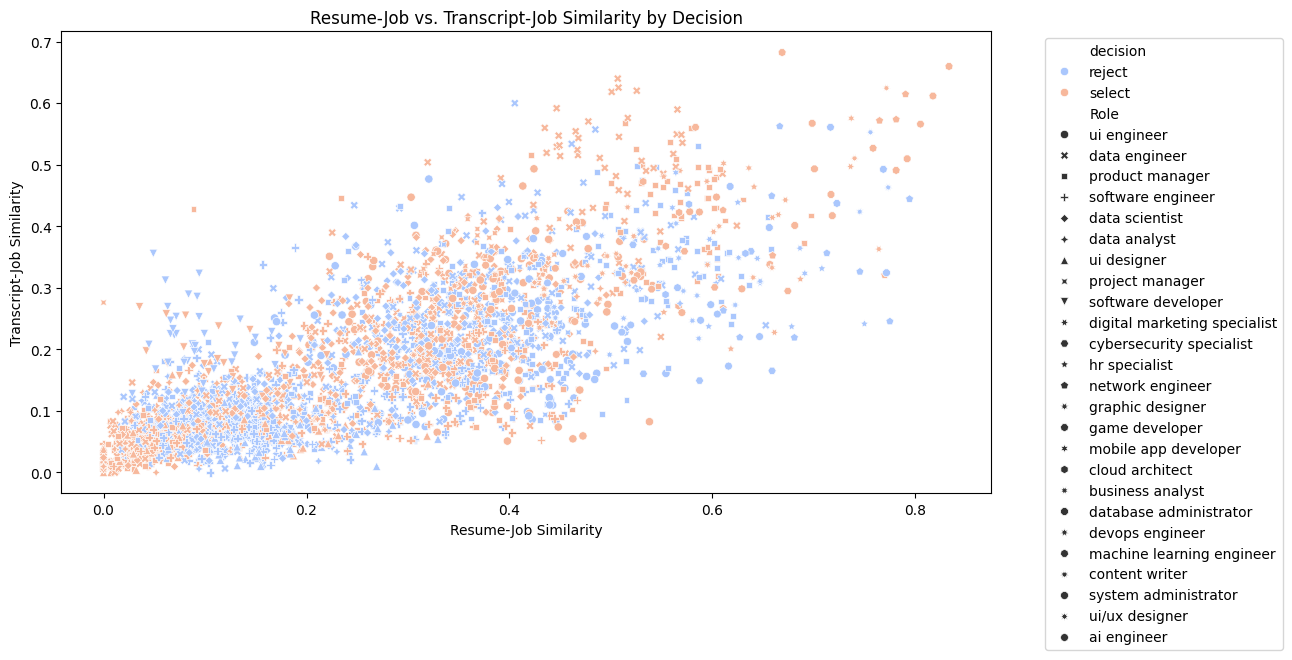

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=final_data,
    x='resume_job_similarity',
    y='transcript_job_similarity',
    hue='decision',
    style='Role',
    palette='coolwarm'
)
plt.title("Resume-Job vs. Transcript-Job Similarity by Decision")
plt.xlabel("Resume-Job Similarity")
plt.ylabel("Transcript-Job Similarity")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


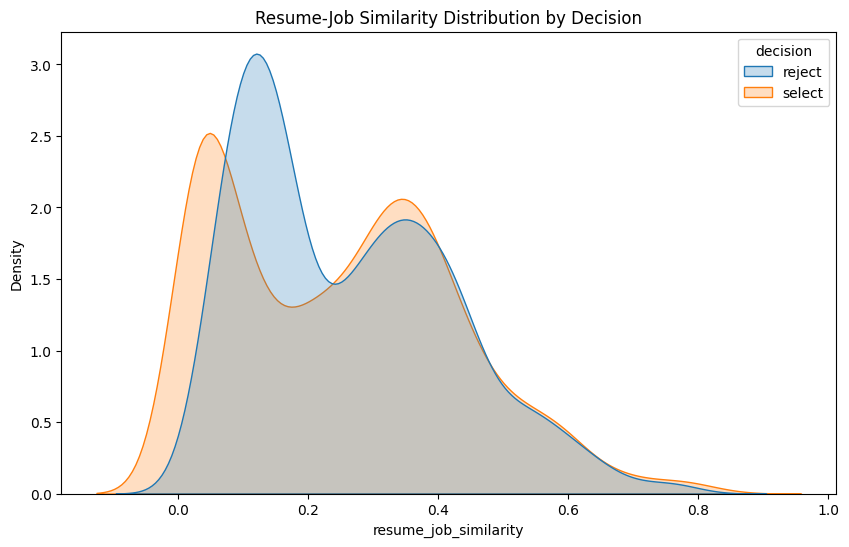

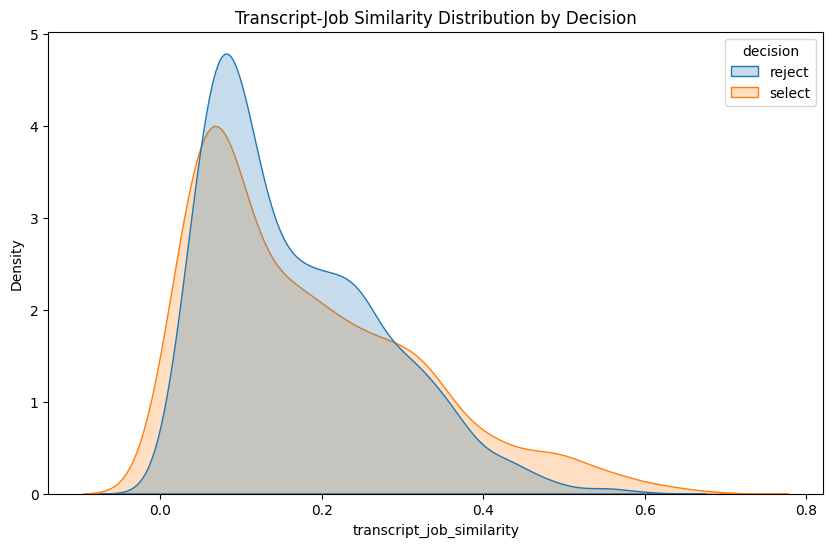

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_data, x='resume_job_similarity', hue='decision', fill=True, common_norm=False)
plt.title("Resume-Job Similarity Distribution by Decision")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_data, x='transcript_job_similarity', hue='decision', fill=True, common_norm=False)
plt.title("Transcript-Job Similarity Distribution by Decision")
plt.show()


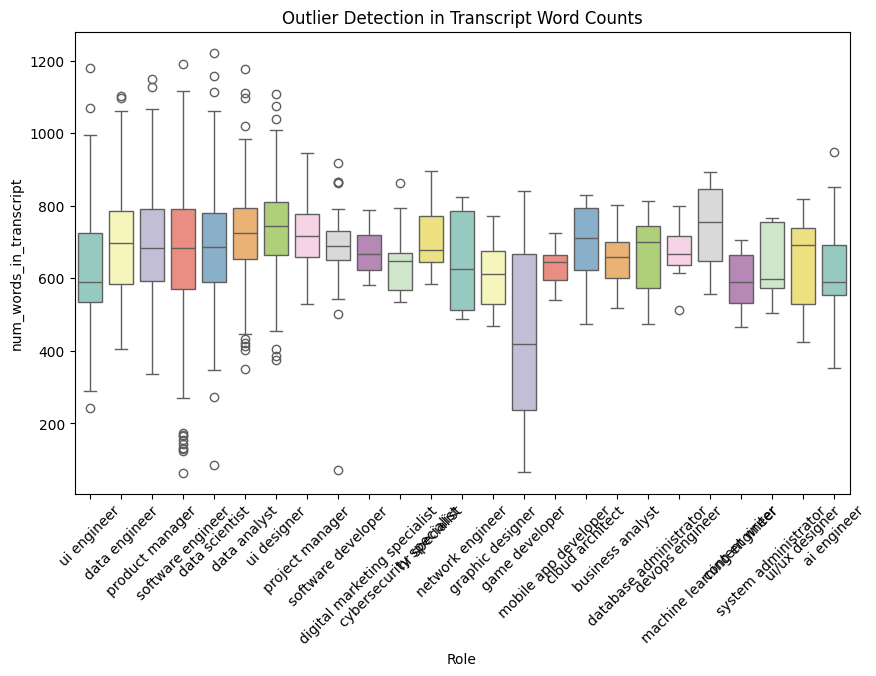

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_data, y='num_words_in_transcript', x='Role', palette='Set3')
plt.title("Outlier Detection in Transcript Word Counts")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Convert the data into a DataFrame
df = pd.DataFrame(final_data)

# Encode the target variable ('decision') into binary (0 for reject, 1 for select)
df['decision'] = df['decision'].map({'reject': 0, 'select': 1})

# List of features to scale/normalize
features_to_scale = [
    "resume_job_similarity",
    "transcript_job_similarity",
    "transcript_sentiment",
    "transcript_word_count",
    "resume_word_count"
]

# Using StandardScaler for standardization
scaler = StandardScaler()
df_scaled = df.copy()  # Create a copy to retain original data
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display scaled features
print("Scaled DataFrame:\n", df_scaled)

Scaled DataFrame:
              ID             Name                       Role  \
0     durgba001  elizabeth smith                ui engineer   
1     durgba002  amanda campbell              data engineer   
2     durgba003    stephen velez            product manager   
3     durgba004         guy shaw              data engineer   
4     durgba005   jeffrey bailey          software engineer   
...         ...              ...                        ...   
3169  VAMSKR196           swathi           graphic designer   
3170  VAMSKR197             suma  machine learning engineer   
3171  VAMSKR198         rajendra            devops engineer   
3172  VAMSKR199           shanti  machine learning engineer   
3173  VAMSKR200            manoj   cybersecurity specialist   

                                             Transcript  \
0     interview transcript interviewer rachel lee se...   
1     interview transcript data engineer position in...   
2     product manager interview interviewer rac

In [ ]:
# Optionally, use MinMaxScaler for normalization if required
minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[features_to_scale] = minmax_scaler.fit_transform(df[features_to_scale])

# Display normalized features
print("\nNormalized DataFrame:\n", df_normalized)


Normalized DataFrame:
              ID             Name                       Role  \
0     durgba001  elizabeth smith                ui engineer   
1     durgba002  amanda campbell              data engineer   
2     durgba003    stephen velez            product manager   
3     durgba004         guy shaw              data engineer   
4     durgba005   jeffrey bailey          software engineer   
...         ...              ...                        ...   
3169  VAMSKR196           swathi           graphic designer   
3170  VAMSKR197             suma  machine learning engineer   
3171  VAMSKR198         rajendra            devops engineer   
3172  VAMSKR199           shanti  machine learning engineer   
3173  VAMSKR200            manoj   cybersecurity specialist   

                                             Transcript  \
0     interview transcript interviewer rachel lee se...   
1     interview transcript data engineer position in...   
2     product manager interview interviewe

In [ ]:
final_data.head()

ID             Name               Role  \
0  durgba001  elizabeth smith        ui engineer   
1  durgba002  amanda campbell      data engineer   
2  durgba003    stephen velez    product manager   
3  durgba004         guy shaw      data engineer   
4  durgba005   jeffrey bailey  software engineer   

                                          Transcript  \
0  interview transcript interviewer rachel lee se...   
1  interview transcript data engineer position in...   
2  product manager interview interviewer rachel l...   
3  interview transcript interviewer rachel patel ...   
4  interview transcript interviewer rachel chen e...   

                                              Resume decision  \
0  elizabeth smith ui engineer contact informatio...   reject   
1  amanda campbell contact information email mail...   reject   
2  stephen velez contact information email mailto...   reject   
3  guy shaw data engineer contact information pho...   select   
4  resume jeffrey bailey jeffrey bailey contact i...   reject   

                                 Reason for decision  \
0  showed lack preparedness typical interview cha...   
1  difficulty applying theoretical knowledge prac...   
2  displayed rigidity adapting alternative approa...   
3  displayed excellent collaboration teamwork min...   
4  difficulty applying theoretical knowledge prac...   

                                     Job Description  \
0  skilled ui engineer expertise frontend framewo...   
1  skilled data engineer expertise python tools d...   
2  skilled product manager expertise roadmap deve...   
3  skilled data engineer expertise python cloud p...   
4  skilled software engineer expertise web develo...   

  Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I see. In a software engineering role, being able to write high-quality, efficient code is crucial. Can you give me an example of a particularly challenging coding problem you've solved in the past? How did you approach it?\n\n**Alice Smith:** Well, there was this one time...I think it was a homework assignment or something. We had to implement a sorting algorithm, and I chose to use...um...merge sort, I think? I don't really remember the details, but it was a while ago.\n\n**Interviewer:** Merge sort is a good choice. But can you tell me more about the specifics of how you implemented it? For example, how did you handle edge cases or optimize the algorithm for performance?\n\n**Alice Smith:** (pauses) Honestly, I don't really remember. I mean, I wrote the code, but I don't recall the details of how I handled edge cases or anything like that.\n\n**Interviewer:** I understand that it's been a while since you wrote the code, but as a software engineer, being able to recall and explain the details of your work is important. Can you tell me about your experience with any specific software development methodologies, such as Agile or Scrum?\n\n**Alice Smith:** (nervously) Uh, I've heard of those...I think? We used something like that on a project once, but I don't really remember the specifics. I'm sure it's not that impor

In [ ]:
!pip install category_encoders

  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the target variable (Y) and features (X)
# Drop irrelevant columns to extract feature variables
X = final_data.drop(columns=['decision', 'Name', 'Role', 'Transcript', 'Resume', 'Reason for decision', 'Job Description'])  # Updated column names

# Instead of converting all columns to numeric and dropping NaNs, try imputing or dropping specific columns
# causing issues:

# 1. Impute missing values (replace NaNs with a specific value, e.g., 0 or the mean)
# For numerical features:
for col in X.select_dtypes(include=np.number).columns:
    X[col] = X[col].fillna(X[col].mean())  # Replace NaNs with the mean of the column

# For categorical features:
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].fillna(X[col].mode()[0]) # Replace NaNs with the most frequent value

# OR

# 2. Drop specific columns that are causing problems
# (Identify these columns based on their data types and missing values)
# problematic_columns = ['column_name1', 'column_name2', ...]
# X = X.drop(columns=problematic_columns)


Y = final_data['decision']
# Filter Y based on the remaining indices in X
#Y = Y[X.index]  # This line might not be needed anymore

# Split the data into 80% training and 20% testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Output shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (2539, 8)
X_test shape: (635, 8)
Y_train shape: (2539,)
Y_test shape: (635,)


In [ ]:
# Check for non-numeric values in X_train and X_test
print("Non-numeric columns in X_train:", X_train.select_dtypes(include=['object']).columns)
print("Non-numeric columns in X_test:", X_test.select_dtypes(include=['object']).columns)

# Check unique values in these problematic columns
for col in X_train.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col} (X_train):", X_train[col].unique())

for col in X_test.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col} (X_test):", X_test[col].unique())


Non-numeric columns in X_train: Index(['ID', 'Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score


In [ ]:
print(X_train.info())
print(X_train.head())


<class 'pandas.core.frame.DataFrame'>
Index: 2539 entries, 1064 to 860
Data columns (total 8 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder  # Import OrdinalEncoder


# Check for non-numeric columns in X_train
print("Columns in X_train:", X_train.columns)
print(X_train.info())

# Convert non-numeric columns to numeric using Label Encoding or One-Hot Encoding
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Use OrdinalEncoder with handle_unknown='use_encoded_value'
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform on training data
X_train[categorical_columns] = encoder.fit_transform(X_train[categorical_columns])

# Transform testing data
X_test[categorical_columns] = encoder.transform(X_test[categorical_columns])

# Verify the transformed data
print(X_train.head())
print(X_test.head())

# Logistic Regression and Grid Search
log_reg = LogisticRegression(random_state=42, max_iter=1000)
param_grid = {
    "C": [0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

# Fit the grid search model
grid_search.fit(X_train, Y_train)

# Output the best parameters and score
best_log_reg = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Columns in X_train: Index(['ID',
       'Here's a simulated interview for a Software Engineer role:\n\n**Interviewer:** Hi Alice, thank you for coming in today. Can you start by telling me a little bit about your background and why you're interested in this Software Engineer role?\n\n**Alice Smith:** Yeah, sure. So, I have a degree in computer science, and I've been working in the field for about three years now. I'm interested in this role because I enjoy coding and problem-solving, and I think this company does some really interesting work.\n\n**Interviewer:** Great, thanks for sharing that. Can you walk me through your experience with a specific programming language? Let's say Java. How have you used Java in previous projects?\n\n**Alice Smith:** Um, I've used Java before...I think. I mean, I've written some Java code, but I don't really remember the specifics. I've worked on a few projects that used Java, but I didn't really have a leading role or anything.\n\n**Interviewer:** I se

In [ ]:
# Make predictions
Y_pred = best_log_reg.predict(X_test)
Y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_lr = accuracy_score(Y_test, Y_pred)
roc_auc_lr = roc_auc_score(Y_test, Y_pred_proba)

print("Accuracy:", accuracy_lr)
print("ROC AUC Score:", roc_auc_lr)


Accuracy: 0.721259842519685
ROC AUC Score: 0.8123065015479876


In [ ]:
print(f"Best Logistic Regression Model: {best_log_reg}")
print(f"Test Set Accuracy: {accuracy_lr:.4f}")
print(f"Test Set ROC AUC Score: {roc_auc_lr:.4f}")


Best Logistic Regression Model: LogisticRegression(C=100, max_iter=1000, random_state=42, solver='liblinear')
Test Set Accuracy: 0.7213
Test Set ROC AUC Score: 0.8123


GridSearchCV: Tunes C (inverse of regularization strength), penalty (type of regularization), and solver (algorithm for optimization).

Accuracy: Measures the proportion of correctly predicted labels.

ROC AUC Score: Evaluates the model's ability to distinguish between classes.

**I got a 72 % accuracy and 81% ROC AUC Score which is good**

# Decision Tree


In [ ]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1


In [ ]:
!pip cache purge

Files removed: 22


In [ ]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 30.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.


In [ ]:
!find . -name "*.so" -delete  # This will delete .so files (C extensions) in your current directory, use with caution

In [ ]:
!pip install scikit-learn==1.3.0  # Install a specific version of scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 30.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.


In [ ]:
!pip install scikit-learn -y
!pip install numpy --upgrade


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade scikit-learn

  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.


In [ ]:
!find . -name "*.so" -delete  # This will delete .so files in your current directory
!pip install scikit-learn

In [ ]:
!pip install scikit-learn --upgrade --force-reinstall --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 168.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 198.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 165.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 182.1 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uninstalled threadpoolctl-3.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.1
    Uninstalling numpy-2.2.1:
      Successfully uninstalled numpy-2.2.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
  Attempting uninstall: scipy
    Fo

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Decision Tree and its hyperparameters
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


In [ ]:
from sklearn.model_selection import GridSearchCV # Import GridSearchCV here
from sklearn.preprocessing import OrdinalEncoder # Import OrdinalEncoder here


# Decision Tree and its hyperparameters
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# ... (Your existing code for data loading and cleaning) ...

# Ensure X_train and X_test contain only numeric features
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Use OrdinalEncoder to convert categorical features to numeric
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform on training data
X_train[categorical_columns] = encoder.fit_transform(X_train[categorical_columns])

# Transform testing data
X_test[categorical_columns] = encoder.transform(X_test[categorical_columns])

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

# Fit the model on training data (now with numeric features)
grid_search.fit(X_train, Y_train)

# Get the best model
best_decision_tree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [ ]:
# Make predictions
Y_pred = best_decision_tree.predict(X_test)
Y_pred_proba = best_decision_tree.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_dt = accuracy_score(Y_test, Y_pred)
roc_auc_dt = roc_auc_score(Y_test, Y_pred_proba)

print("Accuracy:", accuracy_dt)
print("ROC AUC Score:", roc_auc_dt)


Accuracy: 0.6535433070866141
ROC AUC Score: 0.7037489084702707


In [ ]:
print(f"Best Decision Tree Model: {best_decision_tree}")
print(f"Test Set Accuracy: {accuracy_dt:.4f}")
print(f"Test Set ROC AUC Score: {roc_auc_dt:.4f}")


Best Decision Tree Model: DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
Test Set Accuracy: 0.6535
Test Set ROC AUC Score: 0.7037


**Now we can say that it is slightly better than logistic regression as it sacccuracy si 65% and ROC AUC Score is 70%**

**Random Forest**

In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade numpy scipy cython


  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.


In [ ]:
import sklearn
import numpy
import scipy

print("Scikit-learn version:", sklearn.__version__)
print("Numpy version:", numpy.__version__)
print("Scipy version:", scipy.__version__)


Scikit-learn version: 1.6.1
Numpy version: 2.2.1
Scipy version: 1.15.1


In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn


Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, Y_train_encoded)

# Predictions
Y_pred = rf_model.predict(X_test)
Y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(Y_test_encoded, Y_pred)
roc_auc_rf = roc_auc_score(Y_test_encoded, Y_pred_proba)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")


Accuracy: 0.7654
ROC AUC Score: 0.8445


**Random forest is a etter than Logistic regression and Decision Tree as its accuracy is 74% and ROCAUC Score is 84% bold text**

#XG Boost

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Define the model
xgboost_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model directly
xgboost_model.fit(X_train, Y_train_encoded)

# Predictions
Y_pred = xgboost_model.predict(X_test)
Y_pred_proba = xgboost_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_xgb = accuracy_score(Y_test_encoded, Y_pred)
roc_auc_xgb = roc_auc_score(Y_test_encoded, Y_pred_proba)

print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"ROC AUC Score: {roc_auc_xgb:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:47:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7890
ROC AUC Score: 0.8599


**XGBOost is better than the above models(Logistic regression, Decision Tree, Random Forest) as its
Accuracy is 79%
Roc Auc Score is 85%**

#SVM

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score

# Create an SVM model
svm_model = SVC(probability=True, kernel='rbf', C=1, gamma='scale')  # Directly using parameters

# Train the model
svm_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_svm = svm_model.predict(X_test)
Y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Probability for ROC AUC

# Evaluate model using Accuracy and ROC AUC Score
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
roc_auc_svm = roc_auc_score(Y_test, Y_pred_prob_svm)

print(f"Accuracy of SVM model: {accuracy_svm:.4f}")
print(f"ROC AUC Score of SVM model: {roc_auc_svm:.4f}")


Accuracy of SVM model: 0.6898
ROC AUC Score of SVM model: 0.7323




**SVM model  Accuracy is 69% Roc Auc Score is 73%**


#**Comparing All the models(POST MODEL ANALYSIS)**

In [ ]:
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}, ROC AUC: {roc_auc_lr:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}, ROC AUC: {roc_auc_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}, ROC AUC: {roc_auc_rf:.4f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}, ROC AUC: {roc_auc_xgb:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}, ROC AUC: {roc_auc_svm:.4f}")


Logistic Regression Accuracy: 0.7213, ROC AUC: 0.8123
Decision Tree Accuracy: 0.6535, ROC AUC: 0.7037
Random Forest Accuracy: 0.7654, ROC AUC: 0.8445
XGBoost Accuracy: 0.7890, ROC AUC: 0.8599
SVM Accuracy: 0.6898, ROC AUC: 0.7323


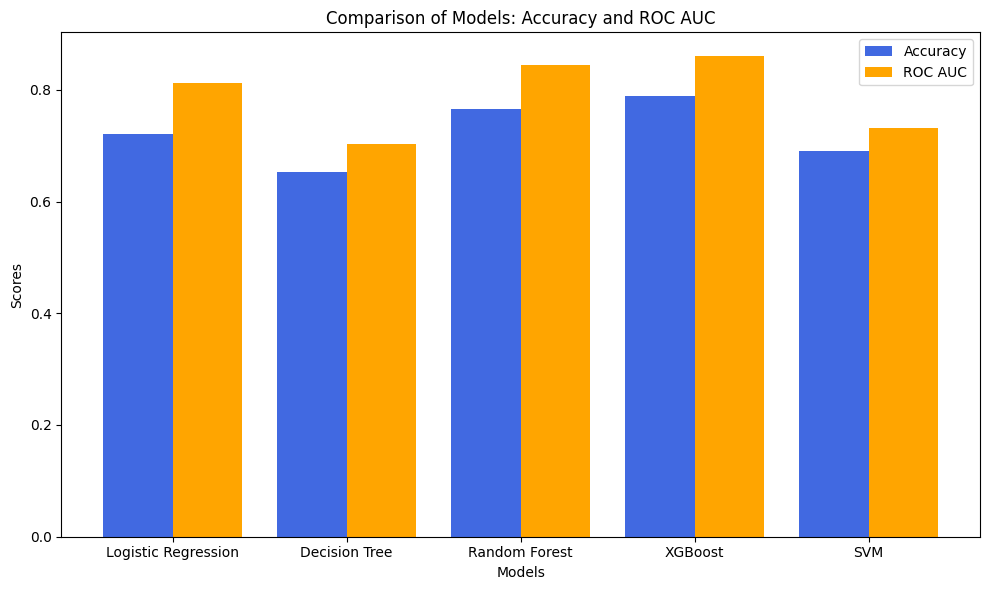

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM']

# Accuracy scores for each model
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_svm]

# ROC AUC scores for each model
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_xgb, roc_auc_svm]

# Plotting the bar chart
x = range(len(models))
width = 0.4  # bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Accuracy bar chart
ax.bar(x, accuracy_scores, width=width, label='Accuracy', color='royalblue', align='center')

# ROC AUC bar chart
ax.bar([p + width for p in x], roc_auc_scores, width=width, label='ROC AUC', color='orange', align='center')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models: Accuracy and ROC AUC')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(models)

# Show legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


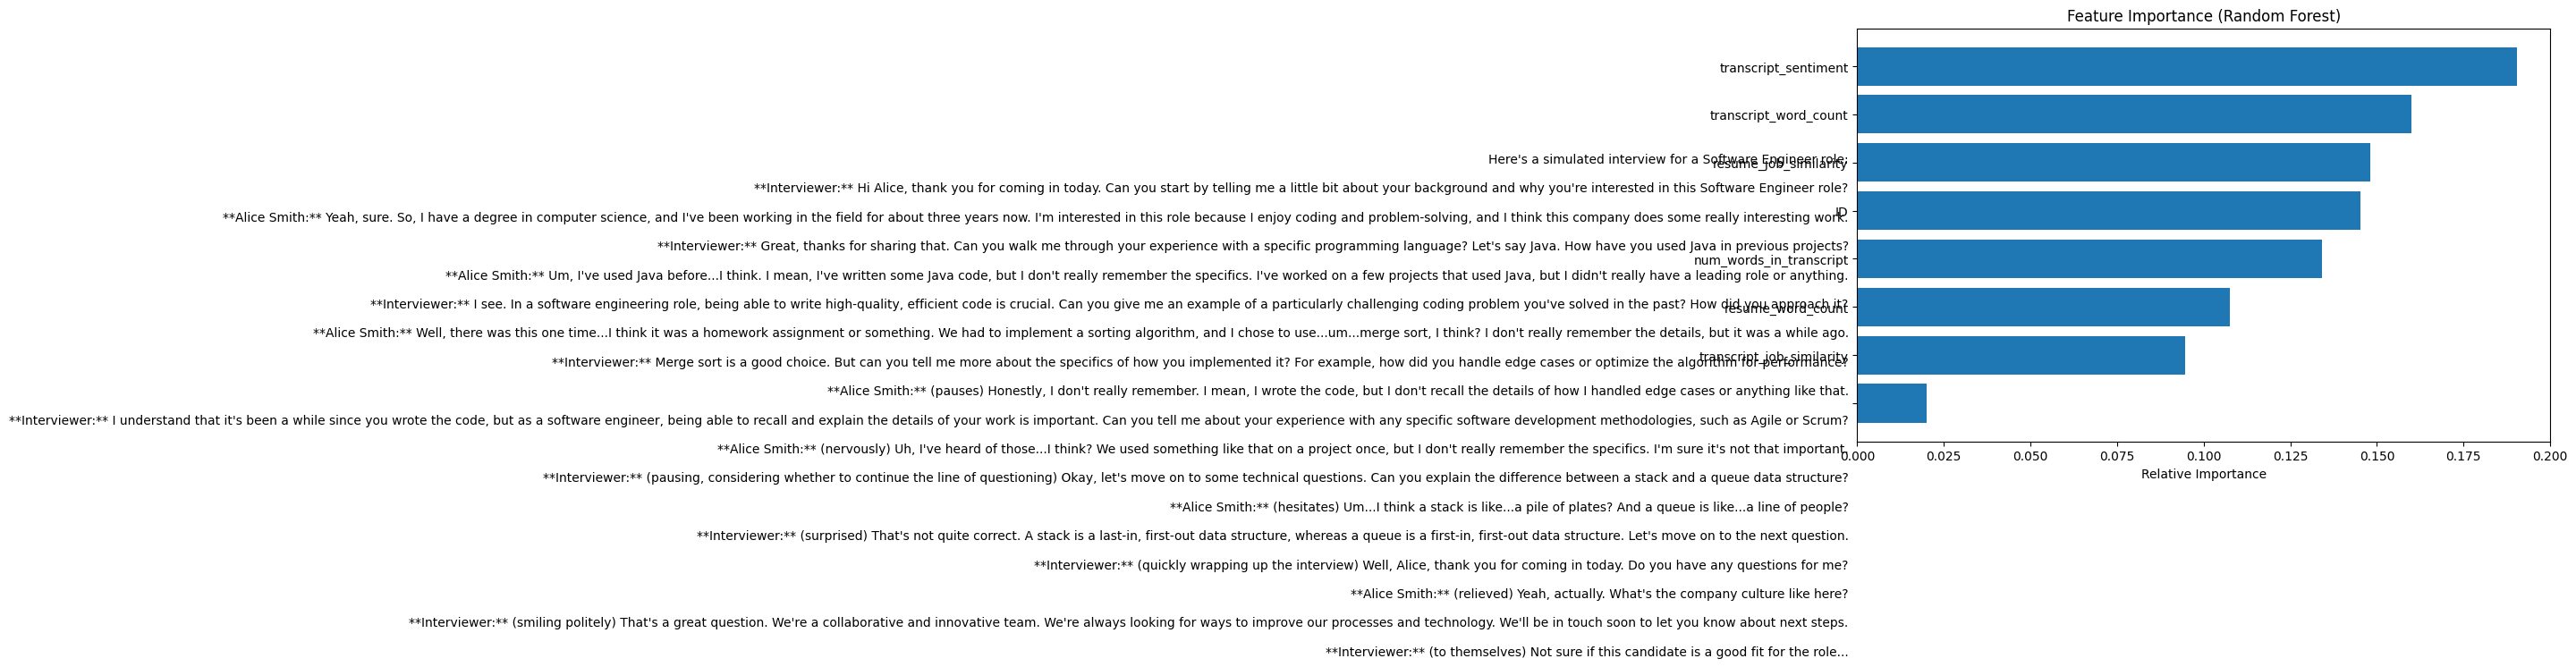

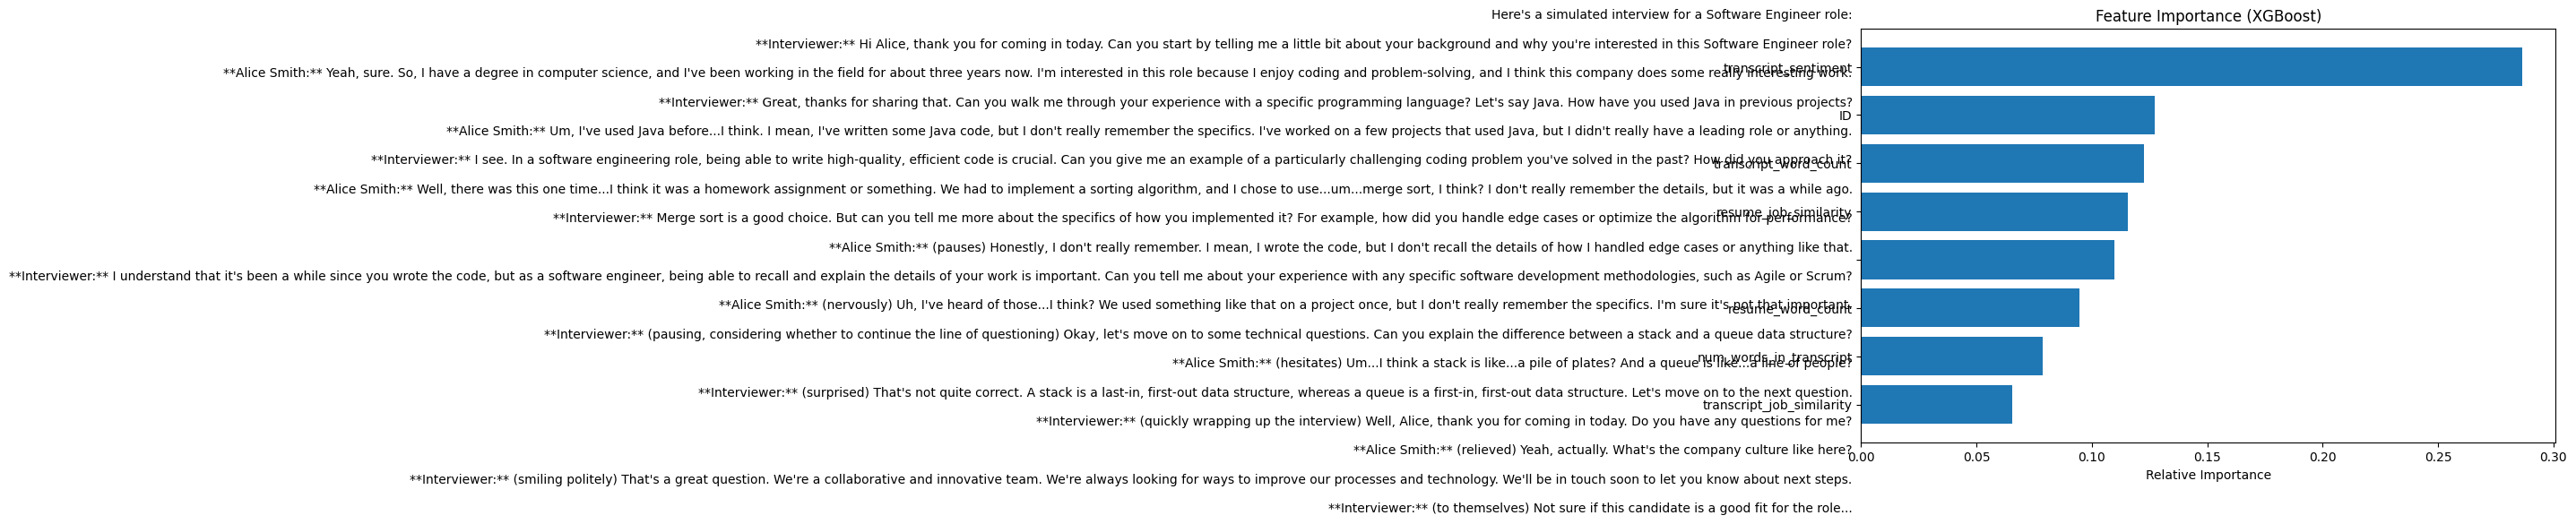

In [ ]:
import matplotlib.pyplot as plt

# For Random Forest
importances_rf = rf_model.feature_importances_
indices_rf = importances_rf.argsort()

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.barh(range(len(importances_rf)), importances_rf[indices_rf], align="center")
plt.yticks(range(len(importances_rf)), [X_train.columns[i] for i in indices_rf])
plt.xlabel("Relative Importance")
plt.show()

# For XGBoost
importances_xgb = xgboost_model.feature_importances_
indices_xgb = importances_xgb.argsort()

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (XGBoost)")
plt.barh(range(len(importances_xgb)), importances_xgb[indices_xgb], align="center")
plt.yticks(range(len(importances_xgb)), [X_train.columns[i] for i in indices_xgb])
plt.xlabel("Relative Importance")
plt.show()


**Significant Insights and Takeaways**:

**Logistic Regression**: While it is a simple and interpretable model, it might perform worse on complex non-linear relationships. It is best suited for linearly separable problems.

**Decision Tree**: Decision Trees provide clear, interpretable results and can be visualized to understand how decisions are made. However, they are prone to overfitting.

**Random Forest**: By aggregating multiple Decision Trees, Random Forest generally provides better generalization and is less likely to overfit compared to a single Decision Tree.
**XGBoost**: XGBoost tends to be a very strong performer in terms of both accuracy and ROC AUC, especially on structured/tabular data. It's efficient and can handle both linear and non-linear relationships.
**SVM**: SVM works well for classification tasks and is effective in high-dimensional spaces. It might not perform as well in very large datasets or with complex feature interactions.
#Best Model:
 Based on the comparison of Accuracy and ROC AUC Score, XGBoost might emerge as the best model, XGBoost (and also Random Forest) allow easy extraction of feature importance, helping you understand which features are driving predictions.

In [ ]:
import joblib

# Assuming your trained model is named 'model'
joblib.dump(best_log_reg, 'R_model.joblib')
from google.colab import files

files.download('R_model.joblib')  # Replace with your model file name


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Assigment 4

In [ ]:
!pip install shap
!pip install pdpbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.1
    Uninstalling numpy-2.2.1:
      Successfully uninstalled numpy-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.1 which is incompatible.
langchain 0.3.14 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.
pytens

In [ ]:
!pip install --upgrade numba
!pip install numpy==1.24.3  # Or a version compatible with Numba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 49.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.1 which is incompatible.
pymc 5.19.1 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.


In [ ]:
!pip install --upgrade pdpbox

In [ ]:
!pip uninstall pdpbox
!pip install pdpbox

Found existing installation: PDPbox 0.3.0
Uninstalling PDPbox-0.3.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/PDPbox-0.3.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pdpbox/*
Proceed (Y/n)? y
  Successfully uninstalled PDPbox-0.3.0
  Using cached PDPbox-0.3.0-py3-none-any.whl.metadata (4.6 kB)
Using cached PDPbox-0.3.0-py3-none-any.whl (35.8 MB)


In [ ]:
!pip install shap
!pip install pdpbox
import joblib
import shap
import xgboost as xgb
import pandas as pd

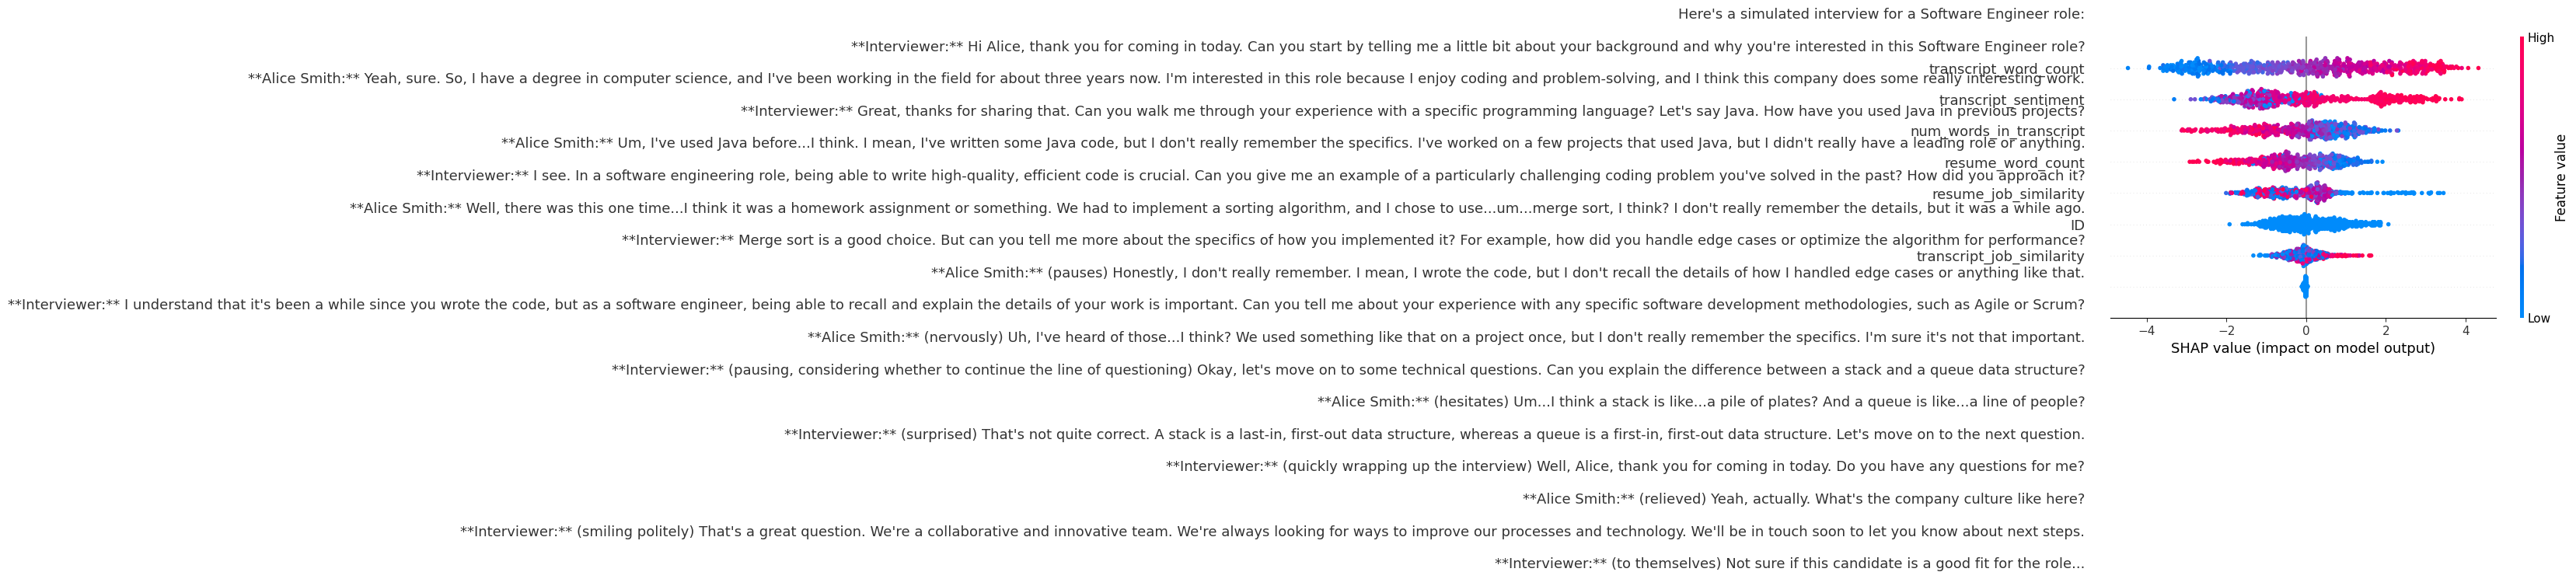

TypeError: waterfall() got an unexpected keyword argument 'features'

In [ ]:
# Load your model
xgboost_model = joblib.load('/content/XGB_model.joblib')

# Initialize the SHAP Explainer
explainer = shap.TreeExplainer(xgboost_model)

# Get the feature names used during training
training_features = xgboost_model.get_booster().feature_names

# Select only these features from X_test and convert to numeric types
X_test_modified = X_test[training_features].copy()  # Create a copy to avoid modifying the original X_test

# Convert 'ID' column to numeric if it's not already
# If 'ID' is categorical, you might need a different encoding strategy
if X_test_modified['ID'].dtype == 'object':
    X_test_modified['ID'] = pd.to_numeric(X_test_modified['ID'], errors='coerce')  # Convert to numeric, handle errors
    X_test_modified['ID'] = X_test_modified['ID'].fillna(-1).astype(int)  # Fill NaNs and convert to int


# Ensure all columns are numeric and handle missing values
for col in X_test_modified.columns:
    if X_test_modified[col].dtype == 'object':
        # If the column is of object type (likely categorical), try converting to numeric
        try:
            X_test_modified[col] = pd.to_numeric(X_test_modified[col], errors='coerce')
        except ValueError:
            # If conversion fails, handle as needed (e.g., drop the column or use a different encoding)
            print(f"Warning: Column '{col}' could not be converted to numeric and will be dropped.")
            X_test_modified = X_test_modified.drop(columns=[col])

    # Fill NaNs with 0 (or another appropriate value)
    X_test_modified[col] = X_test_modified[col].fillna(0)

# Calculate SHAP Values
shap_values = explainer.shap_values(X_test_modified)
# Generate SHAP Plots
# a. Beeswarm Plot
shap.summary_plot(shap_values, X_test_modified, feature_names=X_test_modified.columns)




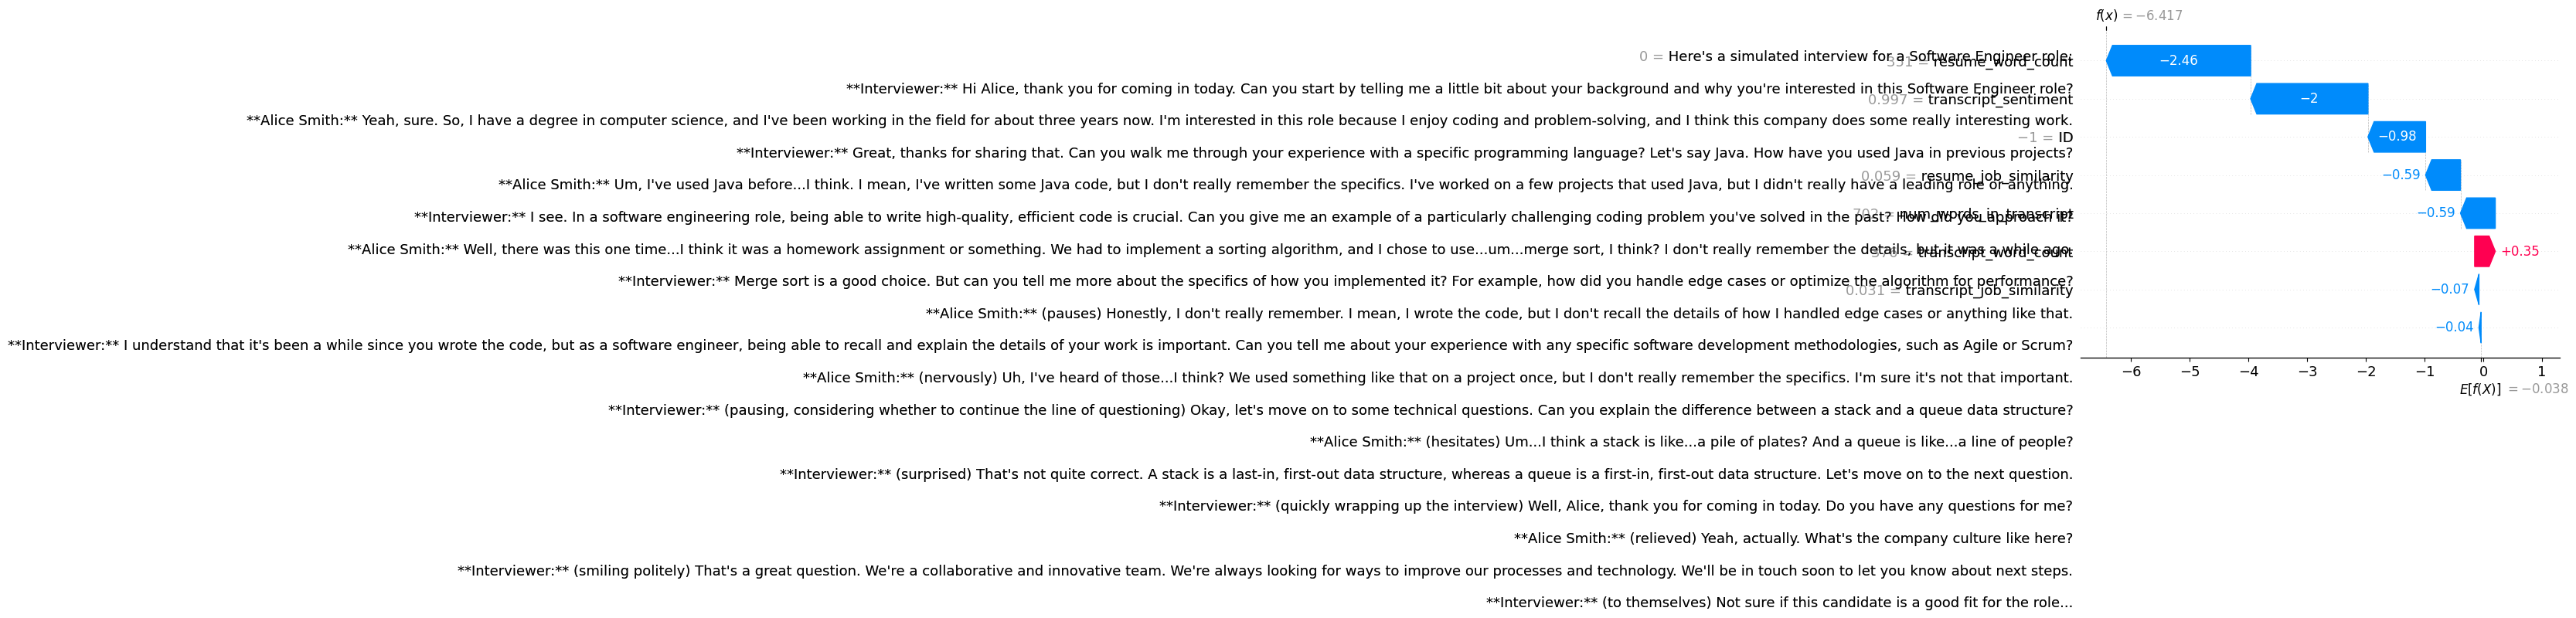

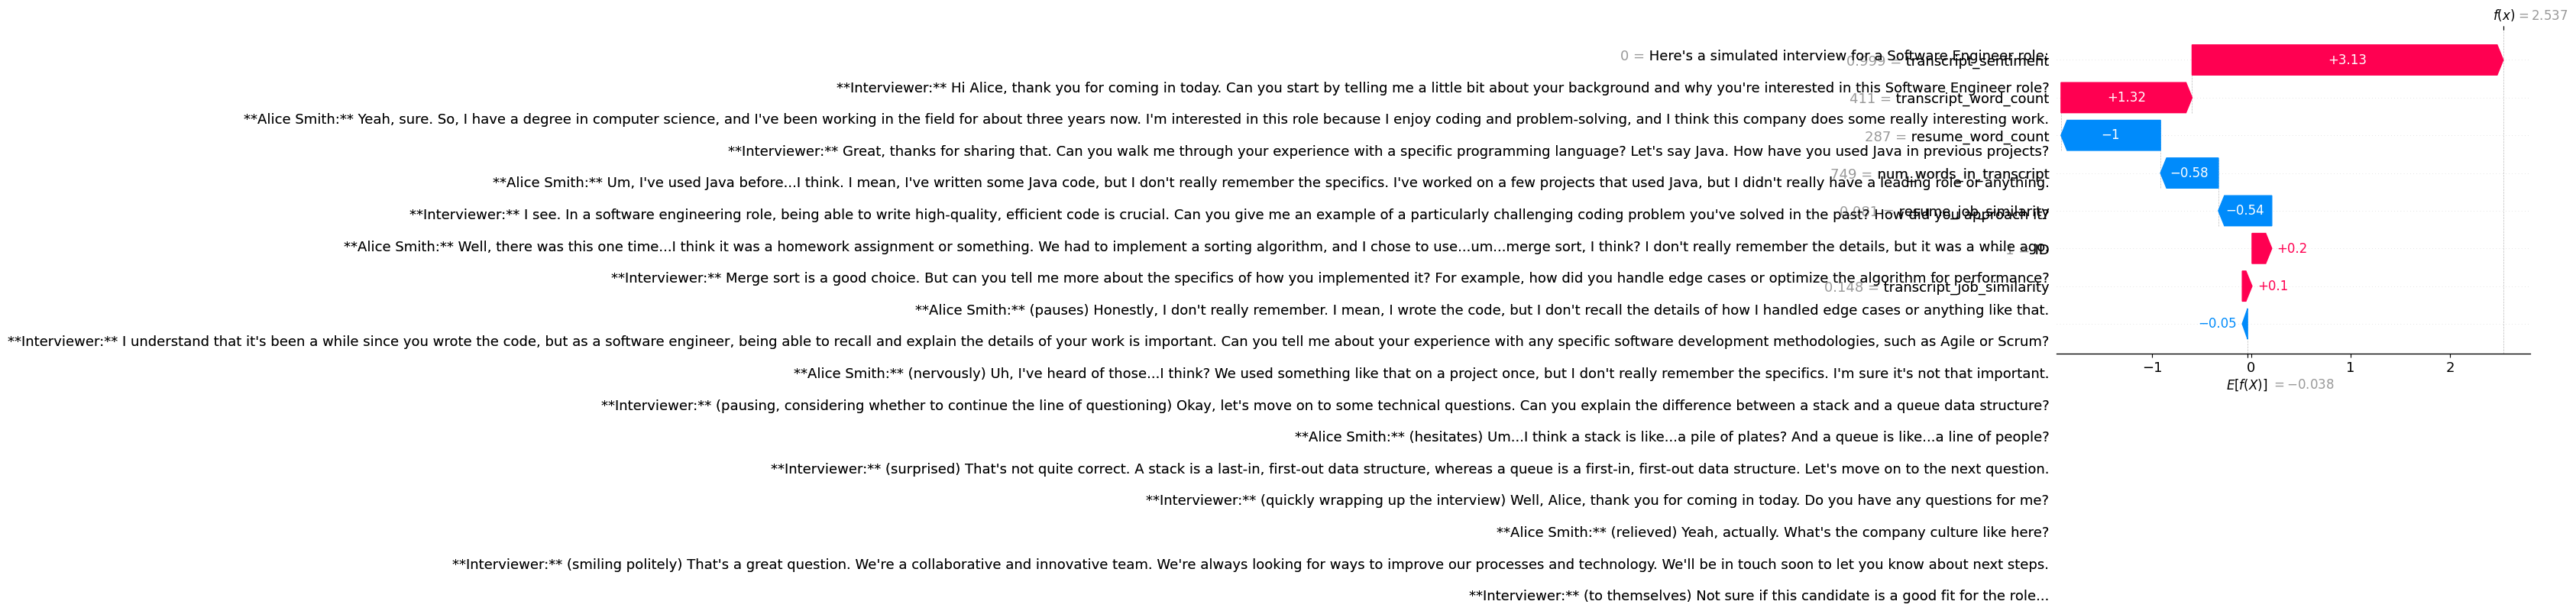

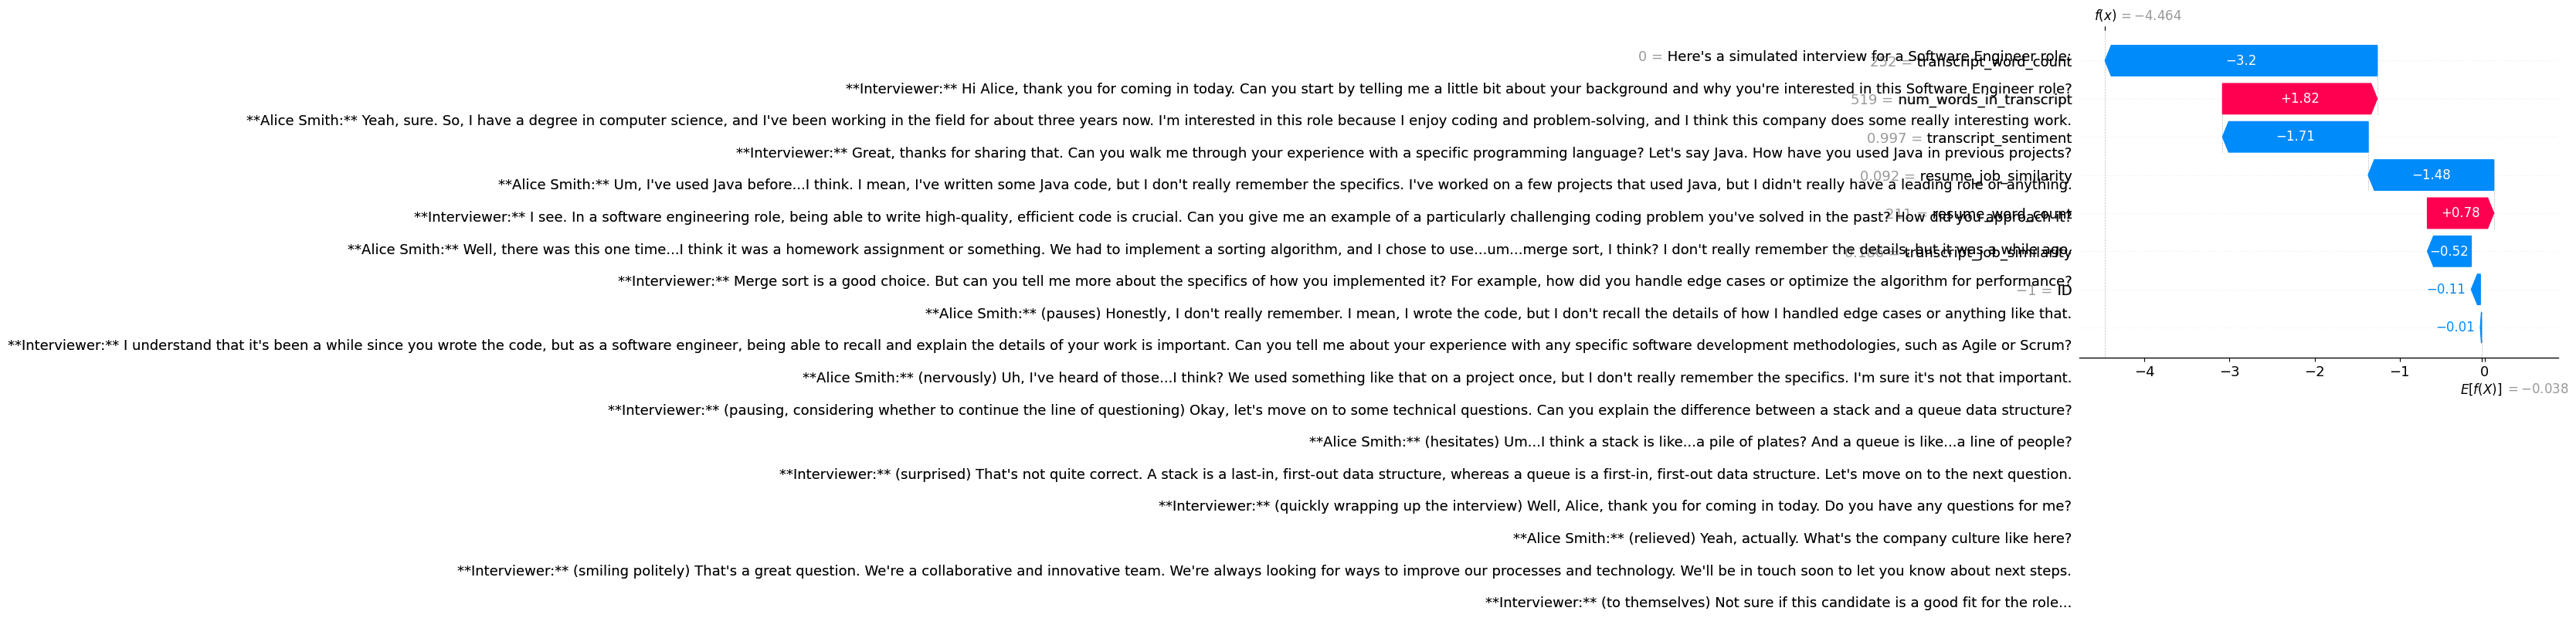

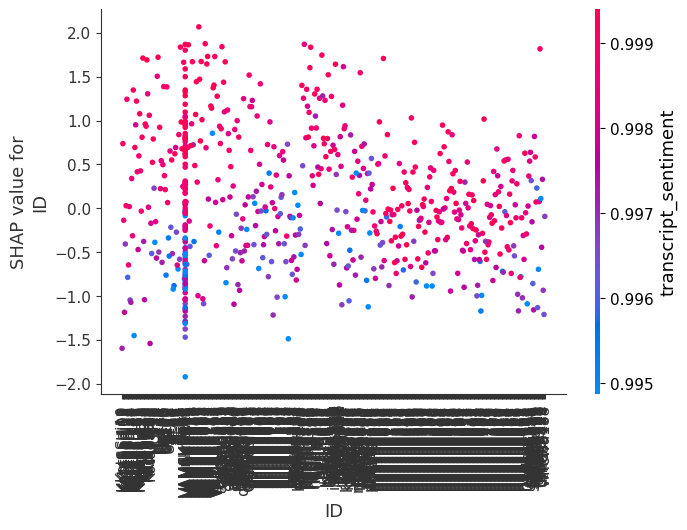

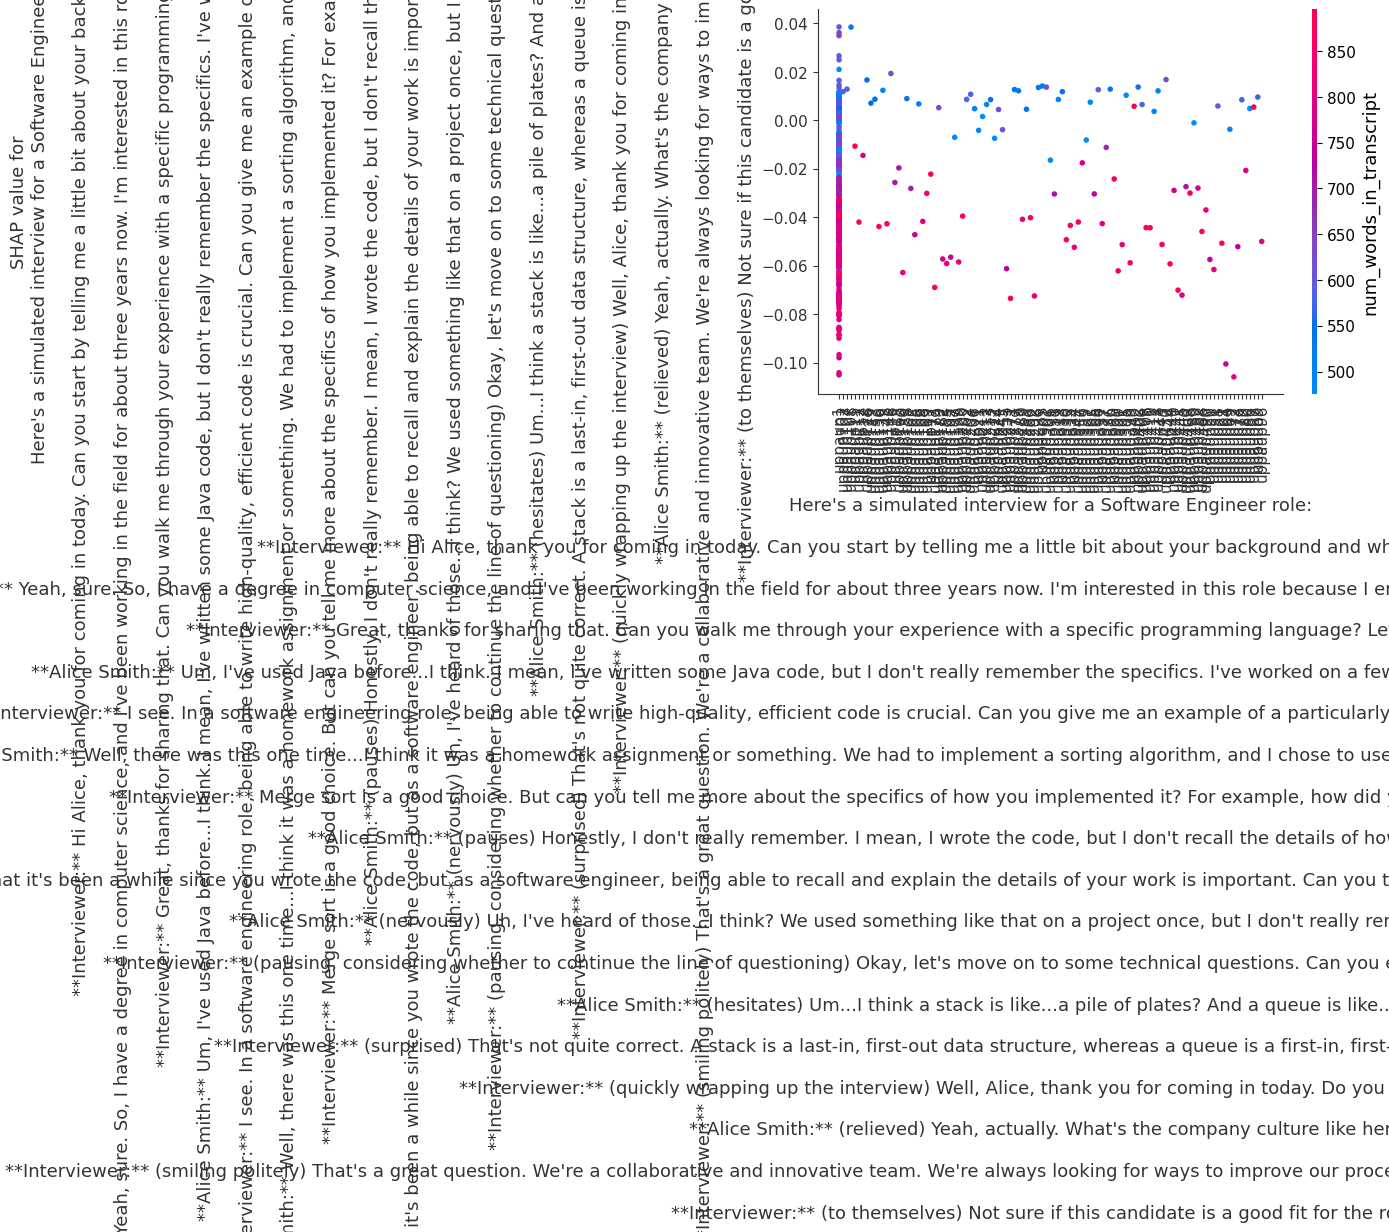

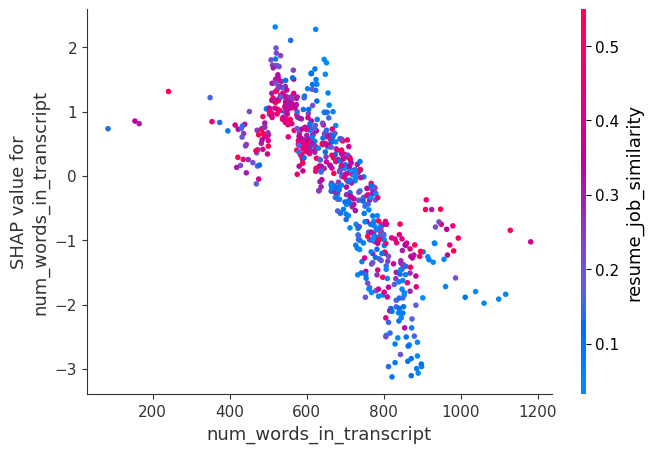

ImportError: cannot import name 'get_dataset' from 'pdpbox' (/usr/local/lib/python3.10/dist-packages/pdpbox/__init__.py)

In [ ]:
# b. Waterfall Plots (for 3 instances - low, high, medium prediction)
# Choose instances based on their predicted probabilities or actual decision values
# Assuming shap_values is the output from explainer.shap_values(X_test_modified)
shap.plots.waterfall(shap.Explanation(values=shap_values[0],
                                      base_values=explainer.expected_value,
                                      data=X_test_modified.iloc[0],
                                      feature_names=X_test_modified.columns))

shap.plots.waterfall(shap.Explanation(values=shap_values[10],
                                      base_values=explainer.expected_value,
                                      data=X_test_modified.iloc[10],
                                      feature_names=X_test_modified.columns))

shap.plots.waterfall(shap.Explanation(values=shap_values[50],
                                      base_values=explainer.expected_value,
                                      data=X_test_modified.iloc[50],
                                      feature_names=X_test_modified.columns))
# c. Dependence Plots (for top 3 features)
for feature in X_test.columns[:3]: # Selecting the top 3 features
    shap.dependence_plot(feature, shap_values, X_test, feature_names=X_test.columns)



In [ ]:
!pip install --upgrade pdpbox
from pdpbox import pdp, info_plots # Import pdp directly
import matplotlib.pyplot as plt

# a. 1D Partial Dependence Plots (for top 3 features)
for feature in X_test.columns[:3]:
    # pdp_isolate is now directly called from pdp
    pdp_isolate = pdp.pdp_isolate(model=xgboost_model, dataset=X_test, model_features=X_test.columns, feature=feature,num_grid_points=20)
    pdp.pdp_plot(pdp_isolate, feature)
    plt.show()

# b. 2D Partial Dependence Plot (for interaction between top 2 features)
features_to_plot = X_test.columns[:2] # Selecting the top 2 features
# pdp_interact is also directly called from pdp
inter1  =  pdp.pdp_interact(model=xgboost_model, dataset=X_test, model_features=X_test.columns, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

AttributeError: module 'pdpbox.pdp' has no attribute 'pdp_isolate'